<a href="https://colab.research.google.com/github/GuilleLondero/ML_challenge_one_DS_telecomX/blob/main/Challenge_TelecomX2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importaciones**

In [1]:
# Conexion de google colab con drive:
from google.colab import drive

# Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, classification_report, roc_auc_score, roc_curve)


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from scipy.stats import randint, uniform
import time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import brier_score_loss

# **2. Extracción del Archivo Tratado**

In [2]:

df_ml_inicial = pd.read_csv('/content/drive/MyDrive/ONE/DATA SCIENCE/ML_challenge_TelecomX2/telecomX1_datos_tratados.csv')

print("✅ Datos cargados desde Drive")
print(f"Shape: {df_ml_inicial.shape}")

✅ Datos cargados desde Drive
Shape: (7043, 22)


In [3]:
df_ml_inicial.head()

,Id_Cliente,Fuga_Cliente,Genero,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


# **3. Eliminación de Columnas Irrelevantes**

In [4]:
# Identificar columnas a eliminar
columnas_a_eliminar = ['Id_Cliente']  # ID único - no aporta valor predictivo

# Crear dataset limpio sin columnas irrelevantes
df_ml = df_ml_inicial.drop(columns=columnas_a_eliminar)

In [5]:
df_ml.head(2)

,Fuga_Cliente,Genero,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


# **4. Encoding**

## **4.1. Identificación automática: Separamos variables por tipo de dato (numéricas vs categóricas)**

In [6]:
# Identificar variables categóricas y numéricas
numericas = df_ml.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df_ml.select_dtypes(include=['object']).columns.tolist()

print("🔍 ANÁLISIS DE TIPOS DE VARIABLES:")
print(f"Variables numéricas ({len(numericas)}): {numericas}")
print(f"Variables categóricas ({len(categoricas)}): {categoricas}")

🔍 ANÁLISIS DE TIPOS DE VARIABLES:
Variables numéricas (17): ['Fuga_Cliente', 'Ciudadano_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Antiguedad_Meses', 'Servicio_Telefono', 'Lineas_Multiples', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Facturacion_Digital', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']
Variables categóricas (4): ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']


## **4.2. Análisis de categorías: Verifico cuántas categorías únicas tiene cada variable categórica**

In [7]:
# Analizar categorías únicas en variables categóricas
if categoricas:
    print("\n📊 ANÁLISIS DE CATEGORÍAS:")
    for col in categoricas:
        unique_vals = df_ml[col].nunique()
        categories = df_ml[col].unique()
        print(f"{col}: {unique_vals} categorías → {list(categories)}")


📊 ANÁLISIS DE CATEGORÍAS:
Genero: 2 categorías → ['Female', 'Male']
Servicio_Internet: 3 categorías → ['DSL', 'Fiber optic', 'No']
Tipo_Contrato: 3 categorías → ['One year', 'Month-to-month', 'Two year']
Metodo_Pago: 4 categorías → ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


## **4.3. One-Hot Encoding: Uso pd.get_dummies() con:**

drop_first=True: Evita multicolinealidad perfecta

dtype=int: Variables binarias como enteros (0/1)

In [8]:
# Aplicar One-Hot Encoding
print(f"\n⚡ APLICANDO ONE-HOT ENCODING...")
print(f"Columnas antes del encoding: {df_ml.shape[1]}")

# Crear dataset con encoding
df_encoded = pd.get_dummies(df_ml, columns=categoricas, drop_first=True, dtype=int)

print(f"Columnas después del encoding: {df_encoded.shape[1]}")
print(f"Nuevas columnas creadas: {df_encoded.shape[1] - df_ml.shape[1]}")


⚡ APLICANDO ONE-HOT ENCODING...
Columnas antes del encoding: 21
Columnas después del encoding: 25
Nuevas columnas creadas: 4


## **4.4. Nuevas columnas: Cada categoría se convierte en una columna binaria**

In [9]:
# Mostrar nuevas columnas creadas
nuevas_columnas = [col for col in df_encoded.columns if col not in df_ml.columns]
if nuevas_columnas:
    print(f"\n🆕 NUEVAS COLUMNAS GENERADAS ({len(nuevas_columnas)}):")
    for col in nuevas_columnas:
        print(f"  • {col}")


🆕 NUEVAS COLUMNAS GENERADAS (8):
  • Genero_Male
  • Servicio_Internet_Fiber optic
  • Servicio_Internet_No
  • Tipo_Contrato_One year
  • Tipo_Contrato_Two year
  • Metodo_Pago_Credit card (automatic)
  • Metodo_Pago_Electronic check
  • Metodo_Pago_Mailed check


## **4.5. Verificación: Confirmo que el encoding funcionó correctamente**

In [10]:
# Verificar estructura final
print(f"\n✅ ENCODING COMPLETADO:")
print(f"Dataset final: {df_encoded.shape[0]} filas × {df_encoded.shape[1]} columnas")
print(f"Target 'Fuga_Cliente' preservado: {'Fuga_Cliente' in df_encoded.columns}")

# Guardar resultado para los siguientes pasos
df_ml_encoded = df_encoded.copy()


✅ ENCODING COMPLETADO:
Dataset final: 7043 filas × 25 columnas
Target 'Fuga_Cliente' preservado: True


# **5. Análisis de Correlación + Multicolinealidad**

## **5.1. Correlación con Target:**
**Identificamos qué variables predicen mejor la cancelación (ordenadas por correlación absoluta)**

In [11]:
# Calcular matriz de correlación
correlation_matrix = df_ml_encoded.corr()

# 1. CORRELACIÓN CON EL TARGET (Fuga_Cliente) ("Variable objetivo")
target_correlations = correlation_matrix['Fuga_Cliente'].abs().sort_values(ascending=False)
print("🎯 TOP 10 VARIABLES MÁS CORRELACIONADAS CON FUGA_Cliente:")
print(target_correlations.head(10))

🎯 TOP 10 VARIABLES MÁS CORRELACIONADAS CON FUGA_Cliente:
Fuga_Cliente                     1.000000
Antiguedad_Meses                 0.352229
Servicio_Internet_Fiber optic    0.308020
Tipo_Contrato_Two year           0.302253
Metodo_Pago_Electronic check     0.301919
Servicio_Internet_No             0.227890
Cargo_Total                      0.199484
Cargo_Diario                     0.193412
Cargo_Mensual                    0.193356
Facturacion_Digital              0.191825
Name: Fuga_Cliente, dtype: float64


## **5.2. Detección de Multicolinealidad:**
**Buscamos variables altamente correlacionadas entre sí (|r| > 0.8) que pueden confundir al modelo**

In [12]:
# 2. IDENTIFICAR MULTICOLINEALIDAD (variables entre sí)
# Buscar correlaciones altas (>0.8) excluyendo diagonal
mask_multicolinealidad = (correlation_matrix.abs() > 0.8) & (correlation_matrix != 1.0)
multicolineales = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if mask_multicolinealidad.iloc[i, j]:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            multicolineales.append((var1, var2, abs(corr_value)))

print(f"\n🚨 MULTICOLINEALIDAD DETECTADA (|r| > 0.8): {len(multicolineales)} pares")
for var1, var2, corr in sorted(multicolineales, key=lambda x: x[2], reverse=True):
    print(f"  • {var1} ↔ {var2}: r={corr:.3f}")


🚨 MULTICOLINEALIDAD DETECTADA (|r| > 0.8): 2 pares
  • Cargo_Mensual ↔ Cargo_Diario: r=1.000
  • Antiguedad_Meses ↔ Cargo_Total: r=0.826


## **5.3. Matriz de Correlación Visual:**

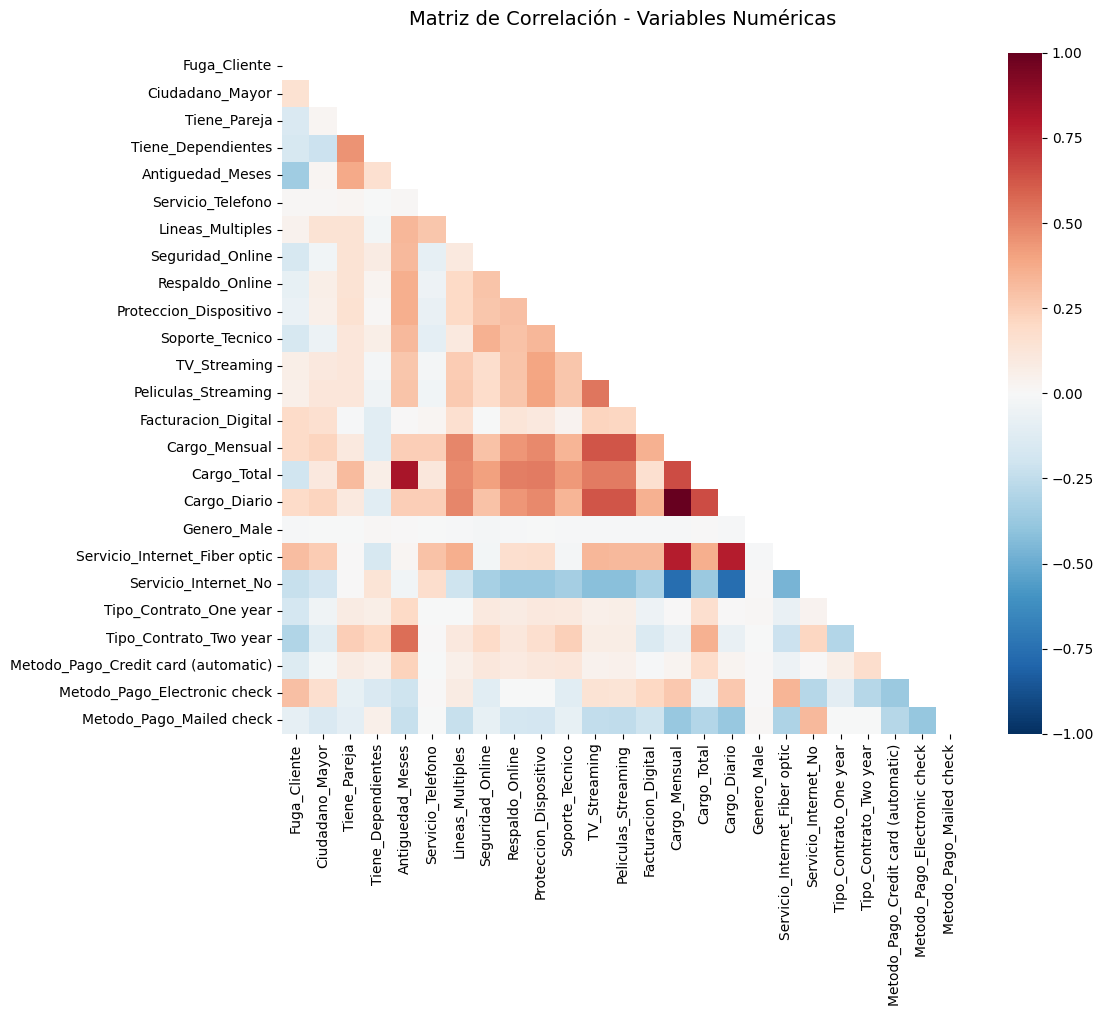

In [13]:
# 3. VISUALIZACIÓN: Matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Solo triángulo inferior
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=False,  # Sin números (sería muy pequeño)
            cmap='RdBu_r',
            center=0,
            vmin=-1, vmax=1,
            square=True)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## **5.4 Ranking Visual:**
**Barplot de las 10 variables más importantes para predecir cancelación**

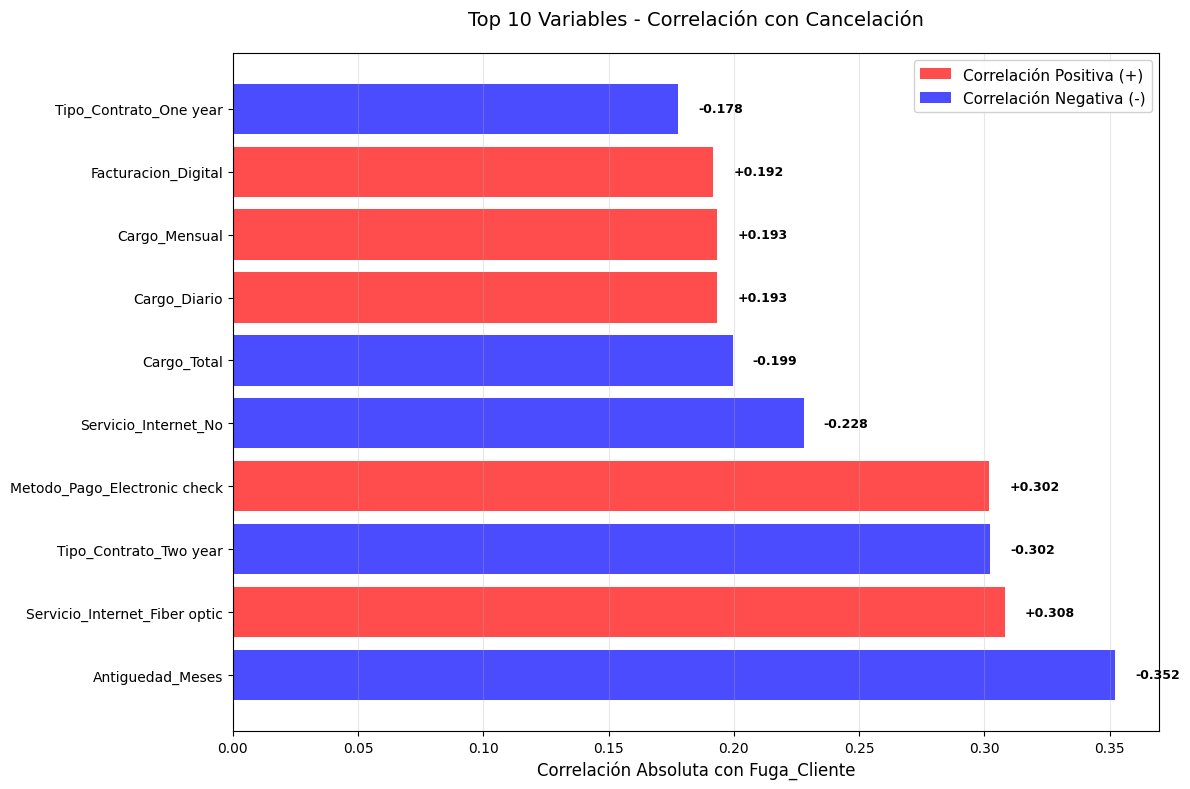


 📊 INTERPRETACIÓN:
🔴 ROJO (+): Mayor valor → Mayor probabilidad de cancelación
🔵 AZUL (-): Mayor valor → Menor probabilidad de cancelación


In [14]:
# 4. VISUALIZACIÓN: Correlaciones con Target

plt.figure(figsize=(12, 8))
target_corr_plot = target_correlations[1:11]  # Excluir Fuga_Cliente consigo misma

# Obtener correlaciones originales (con signo)
original_correlations = correlation_matrix['Fuga_Cliente'][target_corr_plot.index]
colors = ['red' if x > 0 else 'blue' for x in original_correlations]

# Crear gráfico
bars = plt.barh(range(len(target_corr_plot)), target_corr_plot.values, color=colors, alpha=0.7)

# Personalización
plt.yticks(range(len(target_corr_plot)), target_corr_plot.index)
plt.xlabel('Correlación Absoluta con Fuga_Cliente', fontsize=12)
plt.title('Top 10 Variables - Correlación con Cancelación', fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)

# LEYENDA EN POSICIÓN SUPERIOR DERECHA
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Correlación Positiva (+)'),
                   Patch(facecolor='blue', alpha=0.7, label='Correlación Negativa (-)')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.9)

# Agregar valores en las barras
for i, (bar, corr_val) in enumerate(zip(bars, original_correlations)):
    plt.text(bar.get_width() + 0.008, bar.get_y() + bar.get_height()/2,
             f'{corr_val:+.3f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n 📊 INTERPRETACIÓN:")
print("🔴 ROJO (+): Mayor valor → Mayor probabilidad de cancelación")
print("🔵 AZUL (-): Mayor valor → Menor probabilidad de cancelación")

# **6. Selección de Features (eliminar correlacionadas)**


In [15]:
# Variables a eliminar por multicolinealidad
features_eliminar = ['Cargo_Diario', 'Cargo_Total']

print("🗑️ VARIABLES A ELIMINAR POR MULTICOLINEALIDAD:")
for feature in features_eliminar:
    if feature == 'Cargo_Diario':
        print(f"  • {feature}: r=1.000 con Cargo_Mensual (redundancia perfecta)")
    elif feature == 'Cargo_Total':
        print(f"  • {feature}: r=0.826 con Antiguedad_Meses (alta correlación)")

# Eliminar features problemáticas
df_ml_features = df_ml_encoded.drop(columns=features_eliminar)

print(f"\n✅ SELECCIÓN COMPLETADA:")
print(f"Columnas antes: {df_ml_encoded.shape[1]}")
print(f"Columnas después: {df_ml_features.shape[1]}")
print(f"Features eliminadas: {len(features_eliminar)}")

# Recalcular correlaciones con target (verificación)
nuevas_correlaciones = df_ml_features.corr()['Fuga_Cliente'].abs().sort_values(ascending=False)
print(f"\n📊 TOP 5 VARIABLES TRAS SELECCIÓN:")
print(nuevas_correlaciones.head(6))  # 6 para incluir target

🗑️ VARIABLES A ELIMINAR POR MULTICOLINEALIDAD:
  • Cargo_Diario: r=1.000 con Cargo_Mensual (redundancia perfecta)
  • Cargo_Total: r=0.826 con Antiguedad_Meses (alta correlación)

✅ SELECCIÓN COMPLETADA:
Columnas antes: 25
Columnas después: 23
Features eliminadas: 2

📊 TOP 5 VARIABLES TRAS SELECCIÓN:
Fuga_Cliente                     1.000000
Antiguedad_Meses                 0.352229
Servicio_Internet_Fiber optic    0.308020
Tipo_Contrato_Two year           0.302253
Metodo_Pago_Electronic check     0.301919
Servicio_Internet_No             0.227890
Name: Fuga_Cliente, dtype: float64


In [16]:
df_ml_features.head(2)

,Fuga_Cliente,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Facturacion_Digital,Cargo_Mensual,Genero_Male,Servicio_Internet_Fiber optic,Servicio_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,65.6,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,0,59.9,1,0,0,0,0,0,0,1


# **7. Análisis Dirigido**

## **7.1 ANTIGÜEDAD vs CANCELACIÓN**

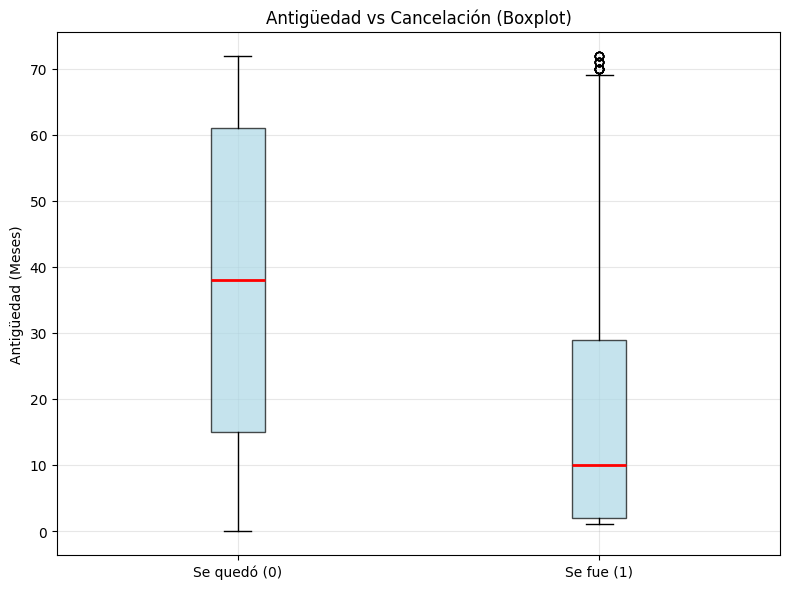

In [17]:
data_se_quedaron = df_ml_features[df_ml_features['Fuga_Cliente']==0]['Antiguedad_Meses']
data_se_fueron = df_ml_features[df_ml_features['Fuga_Cliente']==1]['Antiguedad_Meses']

plt.figure(figsize=(8, 6))
plt.boxplot([data_se_quedaron, data_se_fueron],
            labels=['Se quedó (0)', 'Se fue (1)'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.title('Antigüedad vs Cancelación (Boxplot)')
plt.ylabel('Antigüedad (Meses)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **7.2 CARGO MENSUAL vs CANCELACIÓN**

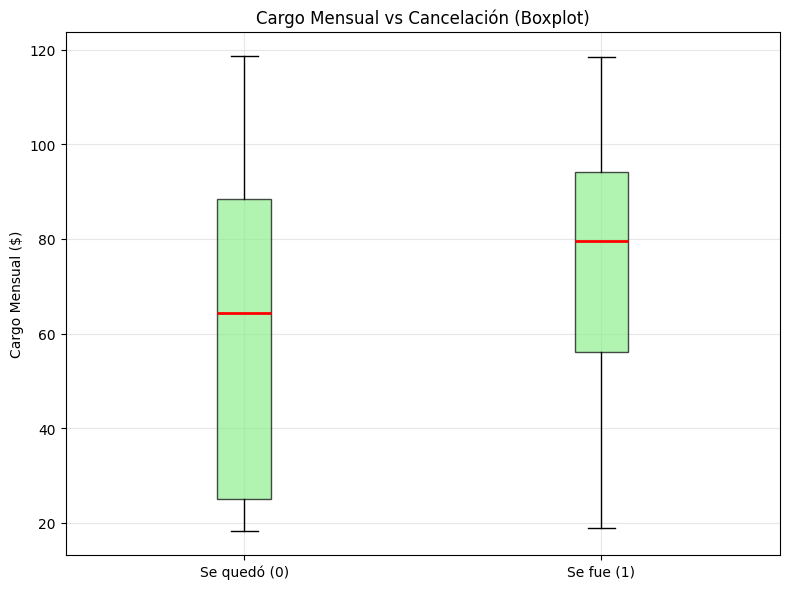

In [18]:
data_cargo_quedaron = df_ml_features[df_ml_features['Fuga_Cliente']==0]['Cargo_Mensual']
data_cargo_fueron = df_ml_features[df_ml_features['Fuga_Cliente']==1]['Cargo_Mensual']

plt.figure(figsize=(8, 6))
plt.boxplot([data_cargo_quedaron, data_cargo_fueron],
            labels=['Se quedó (0)', 'Se fue (1)'],
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.title('Cargo Mensual vs Cancelación (Boxplot)')
plt.ylabel('Cargo Mensual ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **7.3 ANTIGÜEDAD vs CARGO MENSUAL**


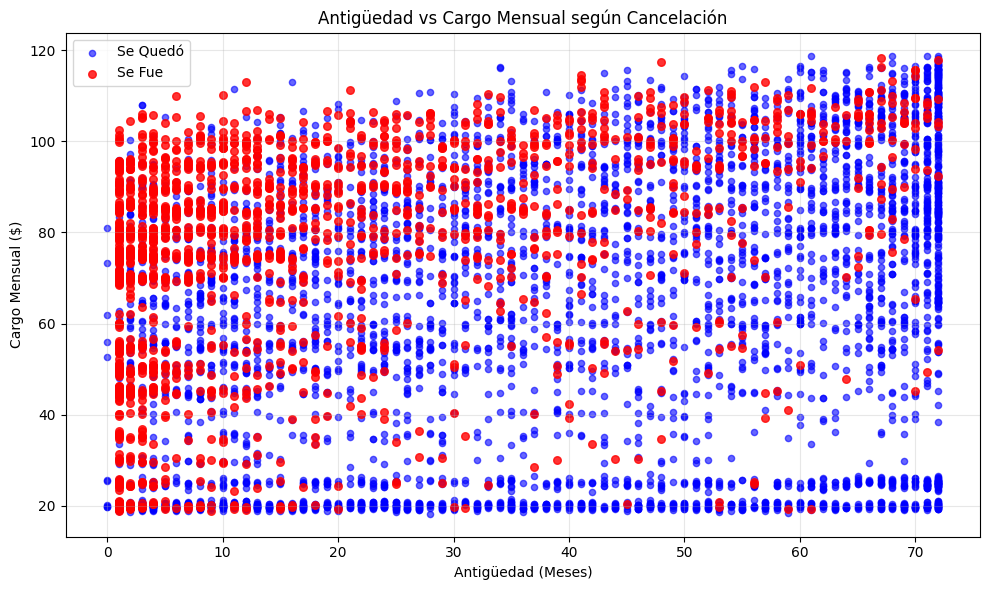

In [19]:
# Separar datos por grupo
se_quedaron = df_ml_features[df_ml_features['Fuga_Cliente'] == 0]
se_fueron = df_ml_features[df_ml_features['Fuga_Cliente'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(se_quedaron['Antiguedad_Meses'], se_quedaron['Cargo_Mensual'],
           alpha=0.6, c='blue', s=20, label='Se Quedó')
plt.scatter(se_fueron['Antiguedad_Meses'], se_fueron['Cargo_Mensual'],
           alpha=0.8, c='red', s=30, label='Se Fue')

plt.title('Antigüedad vs Cargo Mensual según Cancelación')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Cargo Mensual ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **7.4 Resumen Final Análisis Dirigido (conclusiones clave)**

In [20]:
print("\n📊 INSIGHTS CONFIRMADOS:")
print(f"• Antigüedad: Se van los que tienen {data_se_quedaron.mean() - data_se_fueron.mean():.1f} meses MENOS")
print(f"• Cargo: Se van los que pagan ${data_cargo_fueron.mean() - data_cargo_quedaron.mean():.2f} MÁS por mes")
print("• Patrón crítico: 'Clientes nuevos + alto gasto = mayor riesgo'")

print(f"\n🎯 VARIABLES MÁS PREDICTIVAS VALIDADAS:")
print("1. Antiguedad_Meses: r=-0.352")
print("2. Servicio_Internet_Fiber optic: r=+0.308")
print("3. Tipo_Contrato_Two year: r=-0.302")
print("4. Metodo_Pago_Electronic check: r=+0.302")


📊 INSIGHTS CONFIRMADOS:
• Antigüedad: Se van los que tienen 19.6 meses MENOS
• Cargo: Se van los que pagan $13.18 MÁS por mes
• Patrón crítico: 'Clientes nuevos + alto gasto = mayor riesgo'

🎯 VARIABLES MÁS PREDICTIVAS VALIDADAS:
1. Antiguedad_Meses: r=-0.352
2. Servicio_Internet_Fiber optic: r=+0.308
3. Tipo_Contrato_Two year: r=-0.302
4. Metodo_Pago_Electronic check: r=+0.302


# **8. VERIFICACIÓN BALANCE DE CLASES**

## **8.1 CONTEO Y PROPORCIÓN BÁSICA**

In [21]:
# 1. CONTEO ABSOLUTO DE CLASES
print("\n📊 CONTEO ABSOLUTO:")
conteo_clases = df_ml_features['Fuga_Cliente'].value_counts().sort_index()
print(conteo_clases)

# 2. PROPORCIÓN PORCENTUAL
print(f"\n📈 PROPORCIÓN PORCENTUAL:")
proporcion_clases = df_ml_features['Fuga_Cliente'].value_counts(normalize=True).sort_index() * 100
print(f"Clase 0 (Se quedó): {proporcion_clases[0]:.2f}%")
print(f"Clase 1 (Se fue):   {proporcion_clases[1]:.2f}%")

# 3. RATIO DE DESBALANCE
ratio_desbalance = proporcion_clases[0] / proporcion_clases[1]
print(f"\n⚖️ RATIO DE DESBALANCE:")
print(f"Ratio Se quedó / Se fue: {ratio_desbalance:.2f}:1")
print(f"Por cada cliente que se va, {ratio_desbalance:.1f} se quedan")

# 4. EVALUACIÓN DEL DESBALANCE
print(f"\n🎯 EVALUACIÓN:")
if proporcion_clases.min() < 20:
    print("❌ DATASET DESBALANCEADO (clase minoritaria < 20%)")
    necesita_balanceo = True
elif proporcion_clases.min() < 30:
    print("⚠️  DESBALANCE MODERADO (clase minoritaria < 30%)")
    necesita_balanceo = True
else:
    print("✅ DATASET RELATIVAMENTE BALANCEADO")
    necesita_balanceo = False

print(f"Necesita balanceo: {'SÍ' if necesita_balanceo else 'NO'}")


📊 CONTEO ABSOLUTO:
Fuga_Cliente
0    5174
1    1869
Name: count, dtype: int64

📈 PROPORCIÓN PORCENTUAL:
Clase 0 (Se quedó): 73.46%
Clase 1 (Se fue):   26.54%

⚖️ RATIO DE DESBALANCE:
Ratio Se quedó / Se fue: 2.77:1
Por cada cliente que se va, 2.8 se quedan

🎯 EVALUACIÓN:
⚠️  DESBALANCE MODERADO (clase minoritaria < 30%)
Necesita balanceo: SÍ


## **8.2 VISUALIZACIÓN DEL BALANCE**

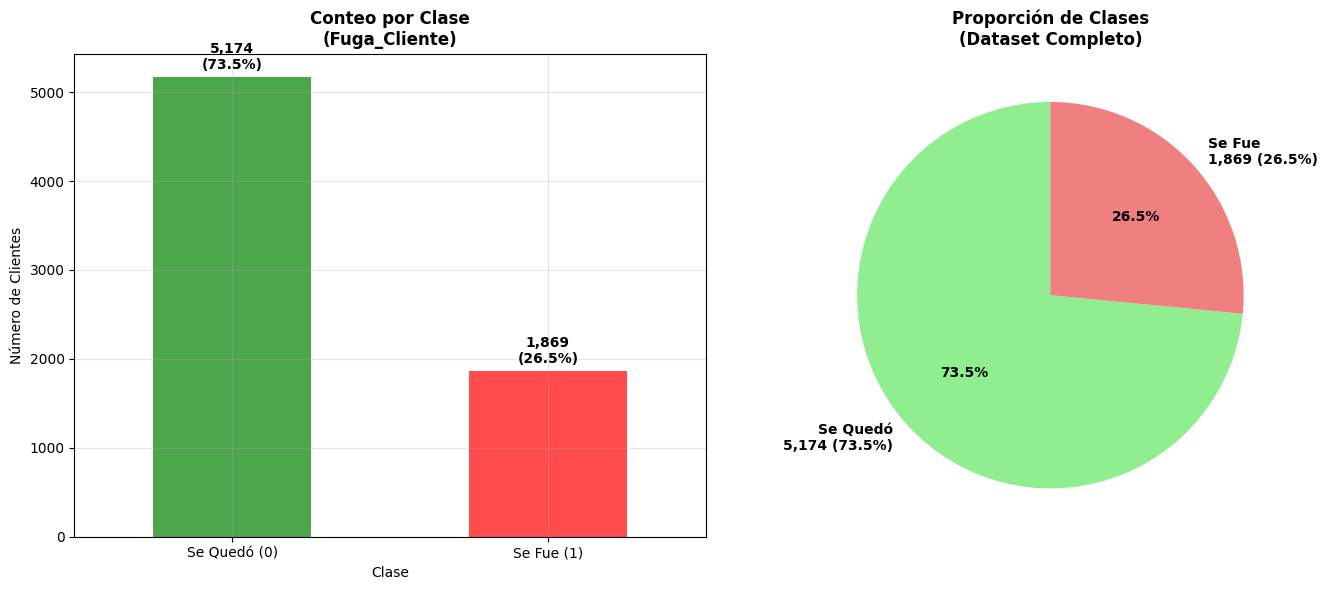

In [22]:
# Crear visualizaciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. GRÁFICO DE BARRAS
conteo_clases.plot(kind='bar', ax=ax1, color=['green', 'red'], alpha=0.7)
ax1.set_title('Conteo por Clase\n(Fuga_Cliente)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Número de Clientes')
ax1.set_xticklabels(['Se Quedó (0)', 'Se Fue (1)'], rotation=0)
ax1.grid(True, alpha=0.3)

# Añadir valores encima de las barras
for i, v in enumerate(conteo_clases.values):
    ax1.text(i, v + 50, f'{v:,}\n({proporcion_clases.iloc[i]:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# 2. GRÁFICO DE TORTA
colors = ['lightgreen', 'lightcoral']
labels = [f'Se Quedó\n{conteo_clases[0]:,} ({proporcion_clases[0]:.1f}%)',
          f'Se Fue\n{conteo_clases[1]:,} ({proporcion_clases[1]:.1f}%)']

ax2.pie(conteo_clases.values, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Proporción de Clases\n(Dataset Completo)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## **8.3 VERIFICACIÓN BALANCE DE CLASES - RESUMEN FINAL**

In [23]:
# Resumen ejecutivo
total_clientes = len(df_ml_features)
clientes_se_fueron = conteo_clases[1]
clientes_se_quedaron = conteo_clases[0]

print(f"\n📋 RESUMEN EJECUTIVO:")
print(f"• Total de clientes: {total_clientes:,}")
print(f"• Se quedaron: {clientes_se_quedaron:,} ({proporcion_clases[0]:.1f}%)")
print(f"• Se fueron: {clientes_se_fueron:,} ({proporcion_clases[1]:.1f}%)")
print(f"• Ratio desbalance: {ratio_desbalance:.1f}:1")

# Diagnóstico final
print(f"\n🎯 DIAGNÓSTICO FINAL:")
if proporcion_clases[1] < 20:
    estado = "CRÍTICO"
    color_estado = "❌"
elif proporcion_clases[1] < 30:
    estado = "MODERADO"
    color_estado = "⚠️ "
else:
    estado = "ACEPTABLE"
    color_estado = "✅"

print(f"{color_estado} Estado del balance: {estado}")
print(f"• Clase minoritaria: {proporcion_clases[1]:.1f}%")
print(f"• Requiere SMOTE: {'SÍ' if necesita_balanceo else 'OPCIONAL'}")

# Métricas a usar
print(f"\n📊 MÉTRICAS RECOMENDADAS PARA EVALUACIÓN:")
if necesita_balanceo:
    print("• F1-Score (PRINCIPAL)")
    print("• Precision y Recall por clase")
    print("• ROC-AUC")
    print("• Accuracy (SECUNDARIA)")
else:
    print("• Accuracy (PRINCIPAL)")
    print("• F1-Score")
    print("• Precision y Recall")


📋 RESUMEN EJECUTIVO:
• Total de clientes: 7,043
• Se quedaron: 5,174 (73.5%)
• Se fueron: 1,869 (26.5%)
• Ratio desbalance: 2.8:1

🎯 DIAGNÓSTICO FINAL:
⚠️  Estado del balance: MODERADO
• Clase minoritaria: 26.5%
• Requiere SMOTE: SÍ

📊 MÉTRICAS RECOMENDADAS PARA EVALUACIÓN:
• F1-Score (PRINCIPAL)
• Precision y Recall por clase
• ROC-AUC
• Accuracy (SECUNDARIA)


# **9.  TRAIN/TEST SPLIT ESTRATIFICADO**

## **9.1 PREPARACIÓN Y SEPARACIÓN DE DATOS**

In [24]:
# 1. PREPARAR CARACTERÍSTICAS (X) Y TARGET (y)
print("\n📊 PREPARACIÓN DE DATOS:")

# Separar features (X) y target (y)
X = df_ml_features.drop('Fuga_Cliente', axis=1)  # Todas las columnas excepto el target
y = df_ml_features['Fuga_Cliente']               # Solo el target

print(f"• Features (X): {X.shape[0]:,} filas x {X.shape[1]} columnas")
print(f"• Target (y): {len(y):,} valores")

# Mostrar las features que usaremos
print(f"\n🎯 FEATURES PARA MODELADO ({len(X.columns)}):")
for i, feature in enumerate(X.columns, 1):
    print(f"{i:2d}. {feature}")

# 2. DIVISIÓN ESTRATIFICADA
print(f"\n🔀 REALIZANDO DIVISIÓN ESTRATIFICADA:")
print("Parámetros:")
print("• Proporción train: 80% | test: 20%")
print("• Estratificación: SÍ (mantiene proporción original)")
print("• Random state: 42 (reproducibilidad)")

# Realizar el split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,      # 20% para test
    random_state=42,     # Reproducibilidad
    stratify=y           # Mantener proporción de clases
)

print(f"\n✅ DIVISIÓN COMPLETADA:")
print(f"• Train set: {X_train.shape[0]:,} registros")
print(f"• Test set:  {X_test.shape[0]:,} registros")
print(f"• Features:  {X_train.shape[1]} variables")


📊 PREPARACIÓN DE DATOS:
• Features (X): 7,043 filas x 22 columnas
• Target (y): 7,043 valores

🎯 FEATURES PARA MODELADO (22):
 1. Ciudadano_Mayor
 2. Tiene_Pareja
 3. Tiene_Dependientes
 4. Antiguedad_Meses
 5. Servicio_Telefono
 6. Lineas_Multiples
 7. Seguridad_Online
 8. Respaldo_Online
 9. Proteccion_Dispositivo
10. Soporte_Tecnico
11. TV_Streaming
12. Peliculas_Streaming
13. Facturacion_Digital
14. Cargo_Mensual
15. Genero_Male
16. Servicio_Internet_Fiber optic
17. Servicio_Internet_No
18. Tipo_Contrato_One year
19. Tipo_Contrato_Two year
20. Metodo_Pago_Credit card (automatic)
21. Metodo_Pago_Electronic check
22. Metodo_Pago_Mailed check

🔀 REALIZANDO DIVISIÓN ESTRATIFICADA:
Parámetros:
• Proporción train: 80% | test: 20%
• Estratificación: SÍ (mantiene proporción original)
• Random state: 42 (reproducibilidad)

✅ DIVISIÓN COMPLETADA:
• Train set: 5,634 registros
• Test set:  1,409 registros
• Features:  22 variables


## **9.2 VERIFICACIÓN DEL BALANCE EN AMBOS CONJUNTOS**

In [25]:
# 1. VERIFICAR BALANCE EN CONJUNTO ORIGINAL
print("🔍 BALANCE EN CONJUNTO ORIGINAL:")
balance_original = y.value_counts(normalize=True).sort_index() * 100
print(f"• Clase 0 (Se quedó): {balance_original[0]:.1f}%")
print(f"• Clase 1 (Se fue):   {balance_original[1]:.1f}%")

# 2. VERIFICAR BALANCE EN TRAIN SET
print(f"\n🚂 BALANCE EN TRAIN SET:")
balance_train = y_train.value_counts(normalize=True).sort_index() * 100
conteo_train = y_train.value_counts().sort_index()
print(f"• Clase 0 (Se quedó): {conteo_train[0]:,} ({balance_train[0]:.1f}%)")
print(f"• Clase 1 (Se fue):   {conteo_train[1]:,} ({balance_train[1]:.1f}%)")

# 3. VERIFICAR BALANCE EN TEST SET
print(f"\n🧪 BALANCE EN TEST SET:")
balance_test = y_test.value_counts(normalize=True).sort_index() * 100
conteo_test = y_test.value_counts().sort_index()
print(f"• Clase 0 (Se quedó): {conteo_test[0]:,} ({balance_test[0]:.1f}%)")
print(f"• Clase 1 (Se fue):   {conteo_test[1]:,} ({balance_test[1]:.1f}%)")

🔍 BALANCE EN CONJUNTO ORIGINAL:
• Clase 0 (Se quedó): 73.5%
• Clase 1 (Se fue):   26.5%

🚂 BALANCE EN TRAIN SET:
• Clase 0 (Se quedó): 4,139 (73.5%)
• Clase 1 (Se fue):   1,495 (26.5%)

🧪 BALANCE EN TEST SET:
• Clase 0 (Se quedó): 1,035 (73.5%)
• Clase 1 (Se fue):   374 (26.5%)


# **10. SMOTE**

## **10.1 PREPARACIÓN E INSTALACIÓN**

In [26]:
# Instalar imbalanced-learn si no está disponible
try:
    from imblearn.over_sampling import SMOTE

except ImportError:
    print("📦 Instalando imbalanced-learn...")
    !pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

from collections import Counter

# 1. ESTADO INICIAL DEL TRAIN SET
print("\n📊 ESTADO INICIAL (ANTES DE SMOTE):")
print(f"• X_train shape: {X_train.shape}")
print(f"• y_train shape: {y_train.shape}")

# Contar clases originales
contador_original = Counter(y_train)
total_original = len(y_train)

print(f"\n📈 DISTRIBUCIÓN ORIGINAL EN TRAIN:")
for clase, cantidad in sorted(contador_original.items()):
    porcentaje = (cantidad / total_original) * 100
    etiqueta = "Se quedó" if clase == 0 else "Se fue"
    print(f"• Clase {clase} ({etiqueta}): {cantidad:,} ({porcentaje:.1f}%)")

# Calcular cuántos registros sintéticos se crearán
clase_mayoritaria = max(contador_original.values())
clase_minoritaria = min(contador_original.values())
registros_sinteticos = clase_mayoritaria - clase_minoritaria

print(f"\n🎯 SMOTE GENERARÁ:")
print(f"• {registros_sinteticos:,} registros sintéticos de la clase minoritaria")
print(f"• Total después de SMOTE: {clase_mayoritaria * 2:,} registros")
print(f"• Balance final: 50% - 50%")


📊 ESTADO INICIAL (ANTES DE SMOTE):
• X_train shape: (5634, 22)
• y_train shape: (5634,)

📈 DISTRIBUCIÓN ORIGINAL EN TRAIN:
• Clase 0 (Se quedó): 4,139 (73.5%)
• Clase 1 (Se fue): 1,495 (26.5%)

🎯 SMOTE GENERARÁ:
• 2,644 registros sintéticos de la clase minoritaria
• Total después de SMOTE: 8,278 registros
• Balance final: 50% - 50%


## **10.2 APLICACIÓN DE SMOTE AL TRAIN SET**

In [27]:
# 1. CONFIGURAR SMOTE
print("⚙️  CONFIGURACIÓN DE SMOTE:")
smote = SMOTE(
    random_state=42,          # Reproducibilidad
    k_neighbors=5,            # Vecinos para generar sintéticos (default)
    sampling_strategy='auto'   # Balancear automáticamente
)
print("• random_state: 42 (reproducible)")
print("• k_neighbors: 5 (vecinos cercanos)")
print("• sampling_strategy: 'auto' (balance completo)")

# 2. APLICAR SMOTE SOLO AL TRAIN SET
print(f"\n🚀 APLICANDO SMOTE...")
print("⚠️  IMPORTANTE: Solo se aplica al TRAIN SET (no al test)")

# Aplicar SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"✅ SMOTE aplicado exitosamente")

# 3. VERIFICAR RESULTADOS
print(f"\n📊 RESULTADOS POST-SMOTE:")
contador_smote = Counter(y_train_smote)
total_smote = len(y_train_smote)

print(f"• X_train_smote shape: {X_train_smote.shape}")
print(f"• y_train_smote shape: {y_train_smote.shape}")

print(f"\n📈 NUEVA DISTRIBUCIÓN EN TRAIN:")
for clase, cantidad in sorted(contador_smote.items()):
    porcentaje = (cantidad / total_smote) * 100
    etiqueta = "Se quedó" if clase == 0 else "Se fue"
    print(f"• Clase {clase} ({etiqueta}): {cantidad:,} ({porcentaje:.1f}%)")

# 4. CALCULAR INCREMENTO
incremento_total = total_smote - total_original
print(f"\n📈 INCREMENTO:")
print(f"• Registros originales: {total_original:,}")
print(f"• Registros después SMOTE: {total_smote:,}")
print(f"• Incremento: +{incremento_total:,} registros ({(incremento_total/total_original)*100:.1f}%)")

⚙️  CONFIGURACIÓN DE SMOTE:
• random_state: 42 (reproducible)
• k_neighbors: 5 (vecinos cercanos)
• sampling_strategy: 'auto' (balance completo)

🚀 APLICANDO SMOTE...
⚠️  IMPORTANTE: Solo se aplica al TRAIN SET (no al test)
✅ SMOTE aplicado exitosamente

📊 RESULTADOS POST-SMOTE:
• X_train_smote shape: (8278, 22)
• y_train_smote shape: (8278,)

📈 NUEVA DISTRIBUCIÓN EN TRAIN:
• Clase 0 (Se quedó): 4,139 (50.0%)
• Clase 1 (Se fue): 4,139 (50.0%)

📈 INCREMENTO:
• Registros originales: 5,634
• Registros después SMOTE: 8,278
• Incremento: +2,644 registros (46.9%)


# **11.NORMALIZACIÓN**

## **11.1 ANÁLISIS DE VARIABLES Y NECESIDAD DE NORMALIZACIÓN**

In [28]:
# 1. ANÁLISIS DE LAS VARIABLES NUMÉRICAS
print("\n🔍 ANÁLISIS DE VARIABLES PARA NORMALIZACIÓN:")

# Identificar variables numéricas (no dummy/binarias)
variables_numericas = []
variables_binarias = []

for col in X_train_smote.columns:
    valores_unicos = X_train_smote[col].nunique()
    if valores_unicos == 2 and set(X_train_smote[col].unique()) == {0, 1}:
        variables_binarias.append(col)
    else:
        variables_numericas.append(col)

print(f"\n📊 CLASIFICACIÓN DE VARIABLES:")
print(f"• Variables numéricas (requieren normalización): {len(variables_numericas)}")
for var in variables_numericas:
    print(f"  - {var}")

print(f"\n• Variables binarias (NO requieren normalización): {len(variables_binarias)}")
for var in variables_binarias[:5]:  # Mostrar solo las primeras 5
    print(f"  - {var}")
if len(variables_binarias) > 5:
    print(f"  - ... y {len(variables_binarias)-5} más")

# 2. ESTADÍSTICAS DE VARIABLES NUMÉRICAS
if variables_numericas:
    print(f"\n📈 ESTADÍSTICAS DE VARIABLES NUMÉRICAS (Train SMOTE):")
    stats_numericas = X_train_smote[variables_numericas].describe()
    print(stats_numericas.round(2))

    # Identificar variables con escalas muy diferentes
    print(f"\n⚖️  ANÁLISIS DE ESCALAS:")
    for var in variables_numericas:
        min_val = X_train_smote[var].min()
        max_val = X_train_smote[var].max()
        rango = max_val - min_val
        print(f"• {var:20}: Rango [{min_val:6.1f} - {max_val:6.1f}] = {rango:6.1f}")



🔍 ANÁLISIS DE VARIABLES PARA NORMALIZACIÓN:

📊 CLASIFICACIÓN DE VARIABLES:
• Variables numéricas (requieren normalización): 2
  - Antiguedad_Meses
  - Cargo_Mensual

• Variables binarias (NO requieren normalización): 20
  - Ciudadano_Mayor
  - Tiene_Pareja
  - Tiene_Dependientes
  - Servicio_Telefono
  - Lineas_Multiples
  - ... y 15 más

📈 ESTADÍSTICAS DE VARIABLES NUMÉRICAS (Train SMOTE):
       Antiguedad_Meses  Cargo_Mensual
count           8278.00        8278.00
mean              27.48          67.70
std               24.08          28.65
min                0.00          18.40
25%                4.00          45.50
50%               21.00          74.50
75%               49.00          90.40
max               72.00         118.75

⚖️  ANÁLISIS DE ESCALAS:
• Antiguedad_Meses    : Rango [   0.0 -   72.0] =   72.0
• Cargo_Mensual       : Rango [  18.4 -  118.8] =  100.3


## **11.2 APLICACIÓN DE STANDARDSCALER**

In [29]:
# 1. CONFIGURAR STANDARDSCALER
print("🔧 CONFIGURACIÓN DE STANDARDSCALER:")
scaler = StandardScaler()
print("• Método: Z-score standardization")
print("• Fórmula: (x - μ) / σ")
print("• Resultado: Media = 0, Desviación = 1")

# 2. AJUSTAR SCALER SOLO CON TRAIN SET (evitar data leakage)
print(f"\n🛡️  AJUSTE DE PARÁMETROS (SOLO TRAIN SET):")
print("⚠️  CRÍTICO: Parámetros calculados SOLO desde X_train_smote")

# Ajustar el scaler solo con datos de entrenamiento
scaler.fit(X_train_smote)
print("✅ Scaler ajustado con train set")

# Obtener estadísticas del scaler
medias = scaler.mean_
desviaciones = scaler.scale_

print(f"\n📊 PARÁMETROS CALCULADOS (desde train set):")
if variables_numericas:
    for i, var in enumerate(X_train_smote.columns):
        if var in variables_numericas:
            print(f"• {var:20}: μ = {medias[i]:8.2f}, σ = {desviaciones[i]:6.2f}")

# 3. APLICAR NORMALIZACIÓN A AMBOS SETS
print(f"\n🔄 APLICANDO NORMALIZACIÓN:")

# Normalizar train set (con SMOTE)
X_train_scaled = scaler.transform(X_train_smote)
print("✅ Train set normalizado (X_train_smote → X_train_scaled)")

# Normalizar test set (CON LOS MISMOS PARÁMETROS)
X_test_scaled = scaler.transform(X_test)
print("✅ Test set normalizado (X_test → X_test_scaled)")
print("   📌 Usando MISMOS parámetros del train set")

# Convertir de nuevo a DataFrames para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"\n📏 CONJUNTOS NORMALIZADOS:")
print(f"• X_train_scaled: {X_train_scaled.shape}")
print(f"• X_test_scaled:  {X_test_scaled.shape}")
print(f"• Mantienen nombres de columnas: ✅")

🔧 CONFIGURACIÓN DE STANDARDSCALER:
• Método: Z-score standardization
• Fórmula: (x - μ) / σ
• Resultado: Media = 0, Desviación = 1

🛡️  AJUSTE DE PARÁMETROS (SOLO TRAIN SET):
⚠️  CRÍTICO: Parámetros calculados SOLO desde X_train_smote
✅ Scaler ajustado con train set

📊 PARÁMETROS CALCULADOS (desde train set):
• Antiguedad_Meses    : μ =    27.48, σ =  24.08
• Cargo_Mensual       : μ =    67.70, σ =  28.65

🔄 APLICANDO NORMALIZACIÓN:
✅ Train set normalizado (X_train_smote → X_train_scaled)
✅ Test set normalizado (X_test → X_test_scaled)
   📌 Usando MISMOS parámetros del train set

📏 CONJUNTOS NORMALIZADOS:
• X_train_scaled: (8278, 22)
• X_test_scaled:  (1409, 22)
• Mantienen nombres de columnas: ✅


# **12 FASE DE MODELADO PREDICTIVO**
### **CREACIÓN DE DOS MODELOS PARA PREDICCIÓN DE CHURN**

## 12.1 **MODELO 1: REGRESIÓN LOGÍSTICA y MODELO 2: RANDOM FOREST**

In [30]:
# Verificar que los datasets estén disponibles
try:
    print(f"✅ X_train_scaled shape: {X_train_scaled.shape}")
    print(f"✅ y_train_smote shape: {y_train_smote.shape}")
    print(f"✅ X_test_scaled shape: {X_test_scaled.shape}")
    print(f"✅ y_test shape: {y_test.shape}")

    print(f"\n📊 Balance del conjunto de entrenamiento:")
    print(f"   - Clase 0 (Se quedó): {sum(y_train_smote == 0):,}")
    print(f"   - Clase 1 (Se fue): {sum(y_train_smote == 1):,}")
    print(f"   - Balance: {sum(y_train_smote == 1) / len(y_train_smote) * 100:.1f}% - {sum(y_train_smote == 0) / len(y_train_smote) * 100:.1f}%")

    print(f"\n📊 Balance del conjunto de prueba (distribución real):")
    print(f"   - Clase 0 (Se quedó): {sum(y_test == 0):,}")
    print(f"   - Clase 1 (Se fue): {sum(y_test == 1):,}")
    print(f"   - Balance: {sum(y_test == 1) / len(y_test) * 100:.1f}% - {sum(y_test == 0) / len(y_test) * 100:.1f}%")

except NameError:
    print("⚠️  ERROR: Los datasets no están disponibles en el entorno.")
    print("   Asegúrate de que X_train_scaled, y_train_smote, X_test_scaled, y_test estén cargados.")
    print("\n💡 SUGERENCIA: Ejecuta primero el código de preprocesamiento.")

# SECCIÓN 1: MODELO 1 - REGRESIÓN LOGÍSTICA
print("\n\n🤖 MODELO 1: REGRESIÓN LOGÍSTICA")
print("=" * 60)
print("📝 Características:")
print("   ✅ Requiere normalización (ya aplicada)")
print("   ✅ Sensible a la escala de datos")
print("   ✅ Alta interpretabilidad")
print("   ✅ Eficiente computacionalmente")
print("   ✅ Probabilidades calibradas")

# Configuración del modelo
print("\n🔧 Configuración del modelo:")
logistic_model = LogisticRegression(
    random_state=42,           # Reproducibilidad
    max_iter=1000,            # Suficientes iteraciones para convergencia
    solver='lbfgs',           # Solver eficiente para datasets medianos
    class_weight='balanced'   # Manejo automático de clases desbalanceadas adicional
)

print("   - Solver: lbfgs (optimizado para datasets medianos)")
print("   - Max iteraciones: 1000")
print("   - Random state: 42 (reproducibilidad)")
print("   - Class weight: balanced (manejo adicional de desbalance)")

# Entrenamiento del modelo
print("\n🚂 ENTRENANDO MODELO DE REGRESIÓN LOGÍSTICA...")
print("-" * 50)

try:
    # Entrenar el modelo
    logistic_model.fit(X_train_scaled, y_train_smote)
    print("✅ Modelo entrenado exitosamente")

    # Predicciones en conjunto de entrenamiento
    y_train_pred_lr = logistic_model.predict(X_train_scaled)
    y_train_proba_lr = logistic_model.predict_proba(X_train_scaled)[:, 1]

    # Predicciones en conjunto de prueba
    y_test_pred_lr = logistic_model.predict(X_test_scaled)
    y_test_proba_lr = logistic_model.predict_proba(X_test_scaled)[:, 1]

    print("✅ Predicciones generadas para train y test")

    # Mostrar información del modelo entrenado
    print(f"\n📊 Información del modelo entrenado:")
    print(f"   - Número de features: {logistic_model.coef_.shape[1]}")
    print(f"   - Intercept: {logistic_model.intercept_[0]:.4f}")
    print(f"   - Convergencia: {'✅ SÍ' if logistic_model.n_iter_[0] < logistic_model.max_iter else '❌ NO'}")
    print(f"   - Iteraciones utilizadas: {logistic_model.n_iter_[0]}")

except Exception as e:
    print(f"❌ Error en el entrenamiento: {e}")

print("\n" + "="*60)

# SECCIÓN 2: MODELO 2 - RANDOM FOREST

print("\n🌳 MODELO 2: RANDOM FOREST")
print("=" * 60)
print("📝 Características:")
print("   ✅ NO requiere normalización")
print("   ✅ Robusto a outliers y ruido")
print("   ✅ Maneja automáticamente interacciones")
print("   ✅ Proporciona feature importance")
print("   ✅ Reduce overfitting vs árboles individuales")

# Configuración del modelo
print("\n🔧 Configuración del modelo:")
random_forest_model = RandomForestClassifier(
    n_estimators=100,          # Número de árboles
    max_depth=10,             # Profundidad máxima para evitar overfitting
    min_samples_split=20,     # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,      # Mínimo de muestras en hojas
    random_state=42,          # Reproducibilidad
    class_weight='balanced',  # Manejo automático de clases desbalanceadas
    n_jobs=-1                 # Usar todos los cores disponibles
)

print("   - N_estimators: 100 árboles")
print("   - Max_depth: 10 (control de overfitting)")
print("   - Min_samples_split: 20")
print("   - Min_samples_leaf: 10")
print("   - Random state: 42 (reproducibilidad)")
print("   - Class weight: balanced")
print("   - N_jobs: -1 (paralelización completa)")

# Entrenamiento del modelo
print("\n🌲 ENTRENANDO MODELO RANDOM FOREST...")
print("-" * 50)

try:
    # Entrenar el modelo
    random_forest_model.fit(X_train_scaled, y_train_smote)
    print("✅ Modelo entrenado exitosamente")

    # Predicciones en conjunto de entrenamiento
    y_train_pred_rf = random_forest_model.predict(X_train_scaled)
    y_train_proba_rf = random_forest_model.predict_proba(X_train_scaled)[:, 1]

    # Predicciones en conjunto de prueba
    y_test_pred_rf = random_forest_model.predict(X_test_scaled)
    y_test_proba_rf = random_forest_model.predict_proba(X_test_scaled)[:, 1]

    print("✅ Predicciones generadas para train y test")

    # Mostrar información del modelo entrenado
    print(f"\n📊 Información del modelo entrenado:")
    print(f"   - Número de árboles: {random_forest_model.n_estimators}")
    print(f"   - Número de features: {random_forest_model.n_features_in_}")
    print(f"   - Profundidad promedio: {np.mean([tree.get_depth() for tree in random_forest_model.estimators_]):.1f}")
    print(f"   - Número de hojas promedio: {np.mean([tree.get_n_leaves() for tree in random_forest_model.estimators_]):.0f}")

except Exception as e:
    print(f"❌ Error en el entrenamiento: {e}")

print("\n" + "="*60)

# RESUMEN DEL PASO 1 COMPLETADO

print("🤖 MODELOS ENTRENADOS:")
print("   1. ✅ Regresión Logística (normalización requerida)")
print("   2. ✅ Random Forest (normalización no requerida)")
print("\n📊 VARIABLES CREADAS:")
print("   - logistic_model: Modelo de Regresión Logística entrenado")
print("   - random_forest_model: Modelo Random Forest entrenado")
print("   - y_train_pred_lr, y_test_pred_lr: Predicciones Logistic Regression")
print("   - y_train_pred_rf, y_test_pred_rf: Predicciones Random Forest")
print("   - y_train_proba_lr, y_test_proba_lr: Probabilidades Logistic Regression")
print("   - y_train_proba_rf, y_test_proba_rf: Probabilidades Random Forest")

✅ X_train_scaled shape: (8278, 22)
✅ y_train_smote shape: (8278,)
✅ X_test_scaled shape: (1409, 22)
✅ y_test shape: (1409,)

📊 Balance del conjunto de entrenamiento:
   - Clase 0 (Se quedó): 4,139
   - Clase 1 (Se fue): 4,139
   - Balance: 50.0% - 50.0%

📊 Balance del conjunto de prueba (distribución real):
   - Clase 0 (Se quedó): 1,035
   - Clase 1 (Se fue): 374
   - Balance: 26.5% - 73.5%


🤖 MODELO 1: REGRESIÓN LOGÍSTICA
📝 Características:
   ✅ Requiere normalización (ya aplicada)
   ✅ Sensible a la escala de datos
   ✅ Alta interpretabilidad
   ✅ Eficiente computacionalmente
   ✅ Probabilidades calibradas

🔧 Configuración del modelo:
   - Solver: lbfgs (optimizado para datasets medianos)
   - Max iteraciones: 1000
   - Random state: 42 (reproducibilidad)
   - Class weight: balanced (manejo adicional de desbalance)

🚂 ENTRENANDO MODELO DE REGRESIÓN LOGÍSTICA...
--------------------------------------------------
✅ Modelo entrenado exitosamente
✅ Predicciones generadas para train y t

## **12.2 JUSTIFICACIÓN DE LA NORMALIZACIÓN**

🔬 JUSTIFICACIÓN DE LA NORMALIZACIÓN EN TELECOMX2
¿Por qué la normalización es crucial para ciertos modelos?
En mi caso para TelecomX2, aplicaque StandardScaler a las features, lo cual es esencial por las siguientes razones:
📊 PROBLEMA SIN NORMALIZACIÓN:

Cargo_Mensual: rango 18-118 (escala ~100)
Antiguedad_Meses: rango 1-72 (escala ~70)
Variables dummy: valores 0-1 (escala ~1)

🎯 IMPACTO EN LOS MODELOS:
🤖 REGRESIÓN LOGÍSTICA:

Usa optimización por gradiente donde las features con mayor magnitud dominan el proceso
Sin normalización: Cargo_Mensual tendría coeficientes artificialmente pequeños vs variables dummy
Con normalización: Todas las features contribuyen equitativamente al modelo

✅ RESULTADO EN TELECOMX2:
La normalización aseguró que variables como Antiguedad_Meses (r=-0.352) y Cargo_Mensual compitan en igualdad de condiciones con variables como Genero_Male, permitiendo que el modelo capture patrones reales sin sesgos de escala.

## **12.3 EVALUACIÓN DE LOS MODELOS**

In [31]:
# PASO 2: EVALUACIÓN COMPLETA CON MÉTRICAS Y ANÁLISIS CRÍTICO

print("📊 PROYECTO TELECOMX2 - EVALUACIÓN DE MODELOS")
print("=" * 70)
print("🎯 Evaluando: Regresión Logística vs Random Forest")
print("📋 Métricas: Accuracy, Precision, Recall, F1-Score, Matriz Confusión")
print("=" * 70)

# FUNCIÓN PARA CALCULAR TODAS LAS MÉTRICAS (DEFINIDA AL INICIO)
def evaluar_modelo(y_true, y_pred, y_proba, nombre_modelo, conjunto=""):
    """
    Función para calcular todas las métricas de evaluación
    """
    # Métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    return {
        'modelo': nombre_modelo,
        'conjunto': conjunto,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'matriz_confusion': cm
    }

# SECCIÓN 1: EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO
print("\n🚂 EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO")
print("=" * 70)
print("📊 Dataset: X_train_scaled + y_train_smote (balanceado 50-50)")
print("🎯 Propósito: Detectar overfitting/underfitting")

# Evaluar Regresión Logística en entrenamiento
lr_train_results = evaluar_modelo(y_train_smote, y_train_pred_lr, y_train_proba_lr,
                                 "Regresión Logística", "Entrenamiento")

# Evaluar Random Forest en entrenamiento
rf_train_results = evaluar_modelo(y_train_smote, y_train_pred_rf, y_train_proba_rf,
                                 "Random Forest", "Entrenamiento")

print(f"\n🤖 REGRESIÓN LOGÍSTICA - ENTRENAMIENTO:")
print(f"   📊 Accuracy:  {lr_train_results['accuracy']:.4f}")
print(f"   🎯 Precision: {lr_train_results['precision']:.4f}")
print(f"   🔍 Recall:    {lr_train_results['recall']:.4f}")
print(f"   ⭐ F1-Score:  {lr_train_results['f1_score']:.4f}")
print(f"   📈 ROC-AUC:   {lr_train_results['roc_auc']:.4f}")

print(f"\n🌳 RANDOM FOREST - ENTRENAMIENTO:")
print(f"   📊 Accuracy:  {rf_train_results['accuracy']:.4f}")
print(f"   🎯 Precision: {rf_train_results['precision']:.4f}")
print(f"   🔍 Recall:    {rf_train_results['recall']:.4f}")
print(f"   ⭐ F1-Score:  {rf_train_results['f1_score']:.4f}")
print(f"   📈 ROC-AUC:   {rf_train_results['roc_auc']:.4f}")

# SECCIÓN 2: EVALUACIÓN EN CONJUNTO DE PRUEBA (CRÍTICA)
print("\n\n🧪 EVALUACIÓN EN CONJUNTO DE PRUEBA (EVALUACIÓN CRÍTICA)")
print("=" * 70)
print("📊 Dataset: X_test_scaled + y_test (distribución real 73.5-26.5)")
print("🎯 Propósito: Rendimiento real del modelo")

# Evaluar Regresión Logística en prueba
lr_test_results = evaluar_modelo(y_test, y_test_pred_lr, y_test_proba_lr,
                                "Regresión Logística", "Prueba")

# Evaluar Random Forest en prueba
rf_test_results = evaluar_modelo(y_test, y_test_pred_rf, y_test_proba_rf,
                                "Random Forest", "Prueba")

print(f"\n🤖 REGRESIÓN LOGÍSTICA - PRUEBA:")
print(f"   📊 Accuracy:  {lr_test_results['accuracy']:.4f}")
print(f"   🎯 Precision: {lr_test_results['precision']:.4f}")
print(f"   🔍 Recall:    {lr_test_results['recall']:.4f}")
print(f"   ⭐ F1-Score:  {lr_test_results['f1_score']:.4f}")
print(f"   📈 ROC-AUC:   {lr_test_results['roc_auc']:.4f}")

print(f"\n🌳 RANDOM FOREST - PRUEBA:")
print(f"   📊 Accuracy:  {rf_test_results['accuracy']:.4f}")
print(f"   🎯 Precision: {rf_test_results['precision']:.4f}")
print(f"   🔍 Recall:    {rf_test_results['recall']:.4f}")
print(f"   ⭐ F1-Score:  {rf_test_results['f1_score']:.4f}")
print(f"   📈 ROC-AUC:   {rf_test_results['roc_auc']:.4f}")

# SECCIÓN 3: MATRICES DE CONFUSIÓN
print("\n\n🎯 MATRICES DE CONFUSIÓN")
print("=" * 70)

# Función para mostrar matriz de confusión interpretada
def mostrar_matriz_confusion(cm, nombre_modelo, conjunto):
    tn, fp, fn, tp = cm.ravel()
    total = tn + fp + fn + tp

    print(f"\n📊 {nombre_modelo} - {conjunto}:")
    print("    Predicción")
    print("         0    1")
    print(f"Real 0  {tn:4d} {fp:4d}  <- Se quedó")
    print(f"     1  {fn:4d} {tp:4d}  <- Se fue")
    print(f"")
    print(f"   ✅ Verdaderos Negativos (TN): {tn:,} - Predijo 'se queda' correctamente")
    print(f"   ❌ Falsos Positivos (FP): {fp:,} - Predijo 'se va' pero se quedó")
    print(f"   ❌ Falsos Negativos (FN): {fn:,} - Predijo 'se queda' pero se fue")
    print(f"   ✅ Verdaderos Positivos (TP): {tp:,} - Predijo 'se va' correctamente")

    return tn, fp, fn, tp

# Mostrar matrices de confusión
print("🧪 CONJUNTO DE PRUEBA (Evaluación crítica):")
tn_lr, fp_lr, fn_lr, tp_lr = mostrar_matriz_confusion(lr_test_results['matriz_confusion'],
                                                      "Regresión Logística", "Prueba")
tn_rf, fp_rf, fn_rf, tp_rf = mostrar_matriz_confusion(rf_test_results['matriz_confusion'],
                                                      "Random Forest", "Prueba")

# SECCIÓN 4: ANÁLISIS DE OVERFITTING/UNDERFITTING
print("\n\n🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING")
print("=" * 70)

# Calcular diferencias entre train y test
lr_accuracy_diff = lr_train_results['accuracy'] - lr_test_results['accuracy']
lr_f1_diff = lr_train_results['f1_score'] - lr_test_results['f1_score']

rf_accuracy_diff = rf_train_results['accuracy'] - rf_test_results['accuracy']
rf_f1_diff = rf_train_results['f1_score'] - rf_test_results['f1_score']

print(f"\n🤖 REGRESIÓN LOGÍSTICA:")
print(f"   📊 Accuracy - Train: {lr_train_results['accuracy']:.4f} | Test: {lr_test_results['accuracy']:.4f}")
print(f"   📉 Diferencia Accuracy: {lr_accuracy_diff:.4f}")
print(f"   ⭐ F1-Score - Train: {lr_train_results['f1_score']:.4f} | Test: {lr_test_results['f1_score']:.4f}")
print(f"   📉 Diferencia F1: {lr_f1_diff:.4f}")

# Diagnóstico Regresión Logística
if lr_accuracy_diff > 0.05:
    print(f"   ⚠️  POSIBLE OVERFITTING (diferencia > 5%)")
elif lr_accuracy_diff < -0.02:
    print(f"   ⚠️  POSIBLE PROBLEMA DE DATOS")
else:
    print(f"   ✅ GENERALIZACIÓN ADECUADA")

print(f"\n🌳 RANDOM FOREST:")
print(f"   📊 Accuracy - Train: {rf_train_results['accuracy']:.4f} | Test: {rf_test_results['accuracy']:.4f}")
print(f"   📉 Diferencia Accuracy: {rf_accuracy_diff:.4f}")
print(f"   ⭐ F1-Score - Train: {rf_train_results['f1_score']:.4f} | Test: {rf_test_results['f1_score']:.4f}")
print(f"   📉 Diferencia F1: {rf_f1_diff:.4f}")

# Diagnóstico Random Forest
if rf_accuracy_diff > 0.05:
    print(f"   ⚠️  POSIBLE OVERFITTING (diferencia > 5%)")
elif rf_accuracy_diff < -0.02:
    print(f"   ⚠️  POSIBLE PROBLEMA DE DATOS")
else:
    print(f"   ✅ GENERALIZACIÓN ADECUADA")

# SECCIÓN 5: COMPARACIÓN CRÍTICA Y RECOMENDACIONES
print("\n\n🏆 COMPARACIÓN CRÍTICA DE MODELOS")
print("=" * 70)

# Determinar mejor modelo por métrica
mejor_accuracy = "Regresión Logística" if lr_test_results['accuracy'] > rf_test_results['accuracy'] else "Random Forest"
mejor_precision = "Regresión Logística" if lr_test_results['precision'] > rf_test_results['precision'] else "Random Forest"
mejor_recall = "Regresión Logística" if lr_test_results['recall'] > rf_test_results['recall'] else "Random Forest"
mejor_f1 = "Regresión Logística" if lr_test_results['f1_score'] > rf_test_results['f1_score'] else "Random Forest"
mejor_roc = "Regresión Logística" if lr_test_results['roc_auc'] > rf_test_results['roc_auc'] else "Random Forest"

print(f"\n📊 GANADOR POR MÉTRICA (en conjunto de prueba):")
print(f"   🎯 Mejor Accuracy:  {mejor_accuracy}")
print(f"   🎯 Mejor Precision: {mejor_precision}")
print(f"   🎯 Mejor Recall:    {mejor_recall}")
print(f"   ⭐ Mejor F1-Score:  {mejor_f1}")
print(f"   📈 Mejor ROC-AUC:   {mejor_roc}")

# Calcular score ponderado (F1 es prioridad según tu especificación)
score_lr = (lr_test_results['f1_score'] * 0.4 +
           lr_test_results['precision'] * 0.25 +
           lr_test_results['recall'] * 0.25 +
           lr_test_results['roc_auc'] * 0.1)

score_rf = (rf_test_results['f1_score'] * 0.4 +
           rf_test_results['precision'] * 0.25 +
           rf_test_results['recall'] * 0.25 +
           rf_test_results['roc_auc'] * 0.1)

modelo_ganador = "Regresión Logística" if score_lr > score_rf else "Random Forest"
score_ganador = max(score_lr, score_rf)

print(f"\n🏆 MODELO GANADOR GENERAL:")
print(f"   🥇 {modelo_ganador}")
print(f"   📊 Score Ponderado: {score_ganador:.4f}")
print(f"   💡 Ponderación: F1-Score (40%) + Precision (25%) + Recall (25%) + ROC-AUC (10%)")

📊 PROYECTO TELECOMX2 - EVALUACIÓN DE MODELOS
🎯 Evaluando: Regresión Logística vs Random Forest
📋 Métricas: Accuracy, Precision, Recall, F1-Score, Matriz Confusión

🚂 EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO
📊 Dataset: X_train_scaled + y_train_smote (balanceado 50-50)
🎯 Propósito: Detectar overfitting/underfitting

🤖 REGRESIÓN LOGÍSTICA - ENTRENAMIENTO:
   📊 Accuracy:  0.8227
   🎯 Precision: 0.8156
   🔍 Recall:    0.8338
   ⭐ F1-Score:  0.8246
   📈 ROC-AUC:   0.9115

🌳 RANDOM FOREST - ENTRENAMIENTO:
   📊 Accuracy:  0.8461
   🎯 Precision: 0.8195
   🔍 Recall:    0.8877
   ⭐ F1-Score:  0.8522
   📈 ROC-AUC:   0.9228


🧪 EVALUACIÓN EN CONJUNTO DE PRUEBA (EVALUACIÓN CRÍTICA)
📊 Dataset: X_test_scaled + y_test (distribución real 73.5-26.5)
🎯 Propósito: Rendimiento real del modelo

🤖 REGRESIÓN LOGÍSTICA - PRUEBA:
   📊 Accuracy:  0.7672
   🎯 Precision: 0.5504
   🔍 Recall:    0.6711
   ⭐ F1-Score:  0.6048
   📈 ROC-AUC:   0.8274

🌳 RANDOM FOREST - PRUEBA:
   📊 Accuracy:  0.7686
   🎯 Precision: 0.548

## **12.4 ANÁLISIS COMPLETO + FEATURE IMPORTANCE**

### **COMPLETANDO LA EVALUACIÓN CON GRÁFICOS Y ANÁLISIS DE IMPORTANCIA**


📊 CROSS-VALIDATION PARA DESVIACIÓN ESTÁNDAR
🤖 REGRESIÓN LOGÍSTICA - Cross Validation (5-fold):
   📊 Accuracy:  0.8114 ± 0.0591
   🎯 Precision: 0.8088 ± 0.0120
   🔍 Recall:    0.8135 ± 0.1416
   ⭐ F1-Score:  0.8054 ± 0.0781

🌳 RANDOM FOREST - Cross Validation (5-fold):
   📊 Accuracy:  0.8132 ± 0.0413
   🎯 Precision: 0.7952 ± 0.0072
   🔍 Recall:    0.8430 ± 0.1041
   ⭐ F1-Score:  0.8154 ± 0.0529


📋 CLASIFICACION REPORTE DETALLADOS
🤖 REGRESIÓN LOGÍSTICA - Conjunto de Prueba:
              precision    recall  f1-score   support

    Se quedó       0.87      0.80      0.84      1035
      Se fue       0.55      0.67      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409


🌳 RANDOM FOREST - Conjunto de Prueba:
              precision    recall  f1-score   support

    Se quedó       0.89      0.78      0.83      1035
      Se fue       0.55      0.73      0.63   

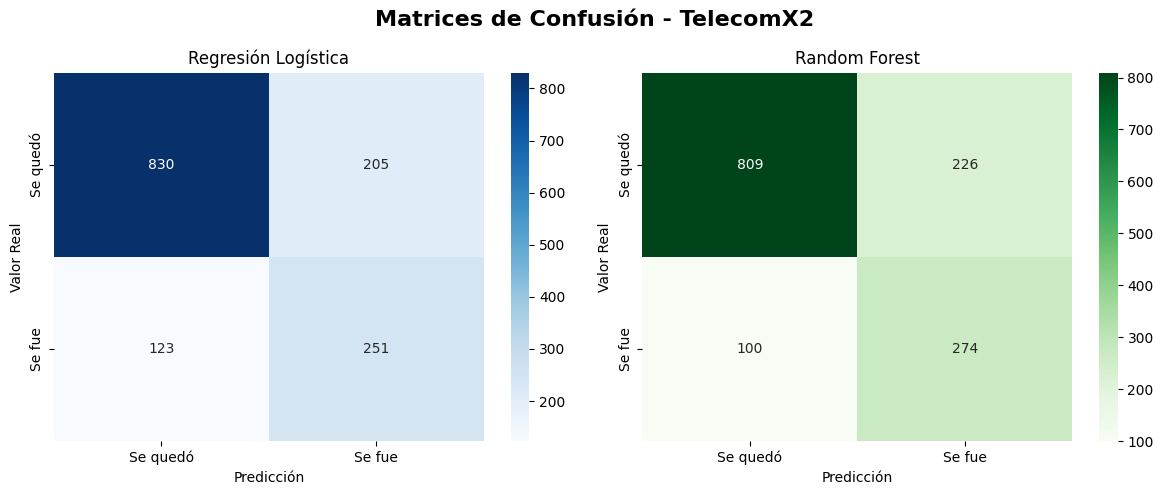



🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES
📊 Analizando importancia de 22 variables

🤖 REGRESIÓN LOGÍSTICA - ANÁLISIS DE COEFICIENTES
------------------------------------------------------------
📋 TOP 10 VARIABLES MÁS IMPORTANTES (Regresión Logística):
Variable                  Coeficiente  Impacto        
-------------------------------------------------------
Cargo_Mensual             7.9097       Aumenta Churn
Servicio_Internet_Fiber optic -2.9335      Reduce Churn
Servicio_Internet_No      2.3075       Aumenta Churn
Servicio_Telefono         -1.8064      Reduce Churn
Peliculas_Streaming       -1.2387      Reduce Churn
TV_Streaming              -1.1945      Reduce Churn
Soporte_Tecnico           -0.8268      Reduce Churn
Seguridad_Online          -0.8250      Reduce Churn
Respaldo_Online           -0.7619      Reduce Churn
Proteccion_Dispositivo    -0.6678      Reduce Churn

💡 INTERPRETACIÓN REGRESIÓN LOGÍSTICA:
   • Coeficiente POSITIVO = Mayor probabilidad de CANCELACIÓN
   • Coefic

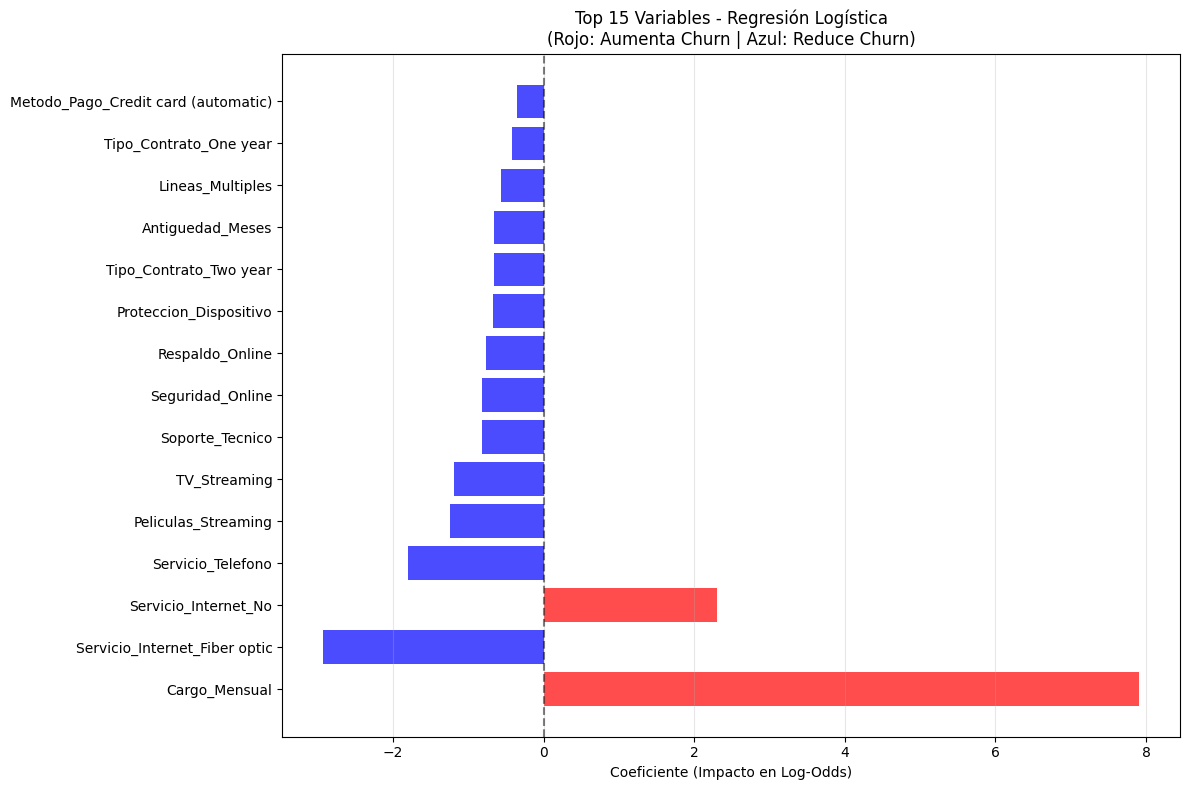



🌳 RANDOM FOREST - ANÁLISIS DE IMPORTANCIA
------------------------------------------------------------
📋 TOP 10 VARIABLES MÁS IMPORTANTES (Random Forest):
Variable                  Importancia  Porcentaje  
-------------------------------------------------------
Antiguedad_Meses          0.1670       16.7        %
Tipo_Contrato_Two year    0.1490       14.9        %
Tipo_Contrato_One year    0.0852       8.5         %
Servicio_Internet_Fiber optic 0.0811       8.1         %
Cargo_Mensual             0.0743       7.4         %
Soporte_Tecnico           0.0632       6.3         %
Seguridad_Online          0.0593       5.9         %
Servicio_Internet_No      0.0574       5.7         %
Tiene_Pareja              0.0529       5.3         %
Tiene_Dependientes        0.0525       5.2         %

💡 INTERPRETACIÓN RANDOM FOREST:
   • Importancia = Reducción promedio de impureza
   • Valores altos = Variables más discriminativas
   • Suma total de importancias = 1.0 (100%)


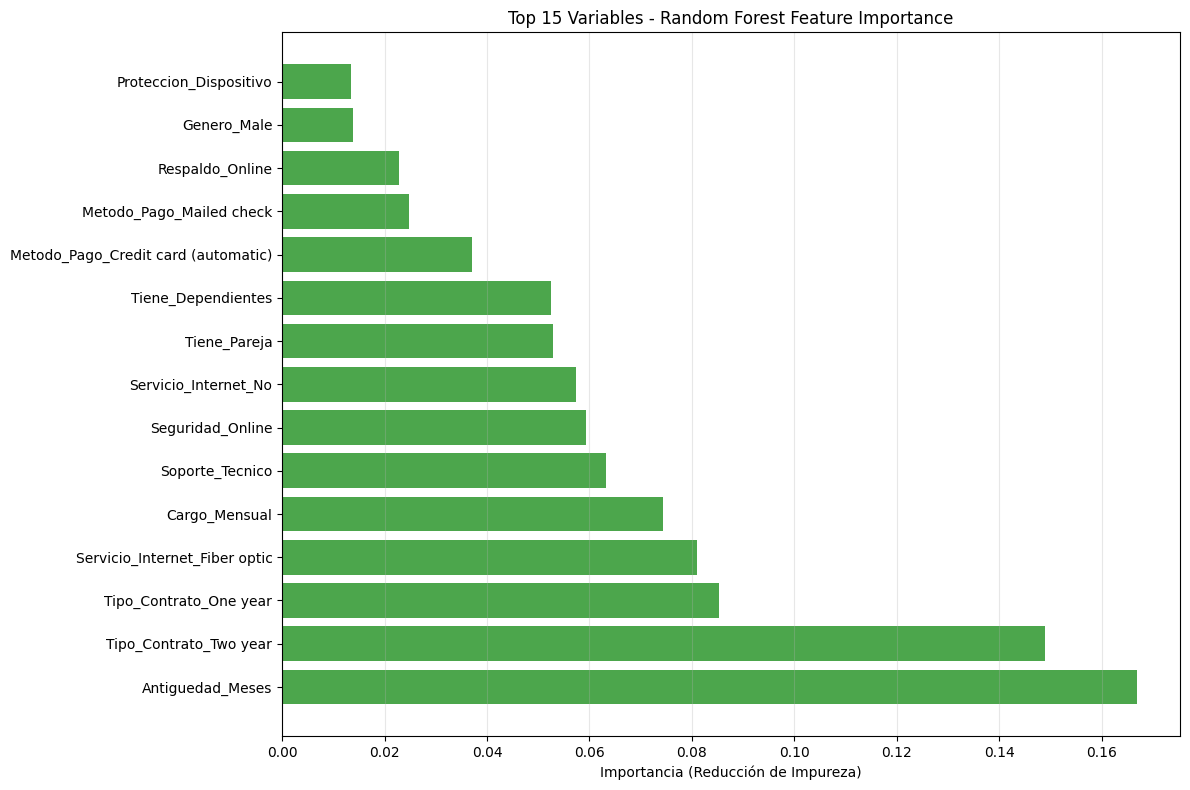



🔄 COMPARACIÓN DE IMPORTANCIAS ENTRE MODELOS
📊 TOP 10 VARIABLES - CONSENSO ENTRE MODELOS:
Variable                  LR (Norm)    RF (Norm)    Promedio  
-----------------------------------------------------------------
Cargo_Mensual             1.000        0.445        0.723     
Antiguedad_Meses          0.083        1.000        0.541     
Tipo_Contrato_Two year    0.084        0.893        0.488     
Servicio_Internet_Fiber optic 0.371        0.486        0.428     
Servicio_Internet_No      0.292        0.344        0.318     
Tipo_Contrato_One year    0.053        0.511        0.282     
Soporte_Tecnico           0.105        0.379        0.242     
Seguridad_Online          0.104        0.355        0.230     
Tiene_Dependientes        0.030        0.314        0.172     
Tiene_Pareja              0.017        0.317        0.167     


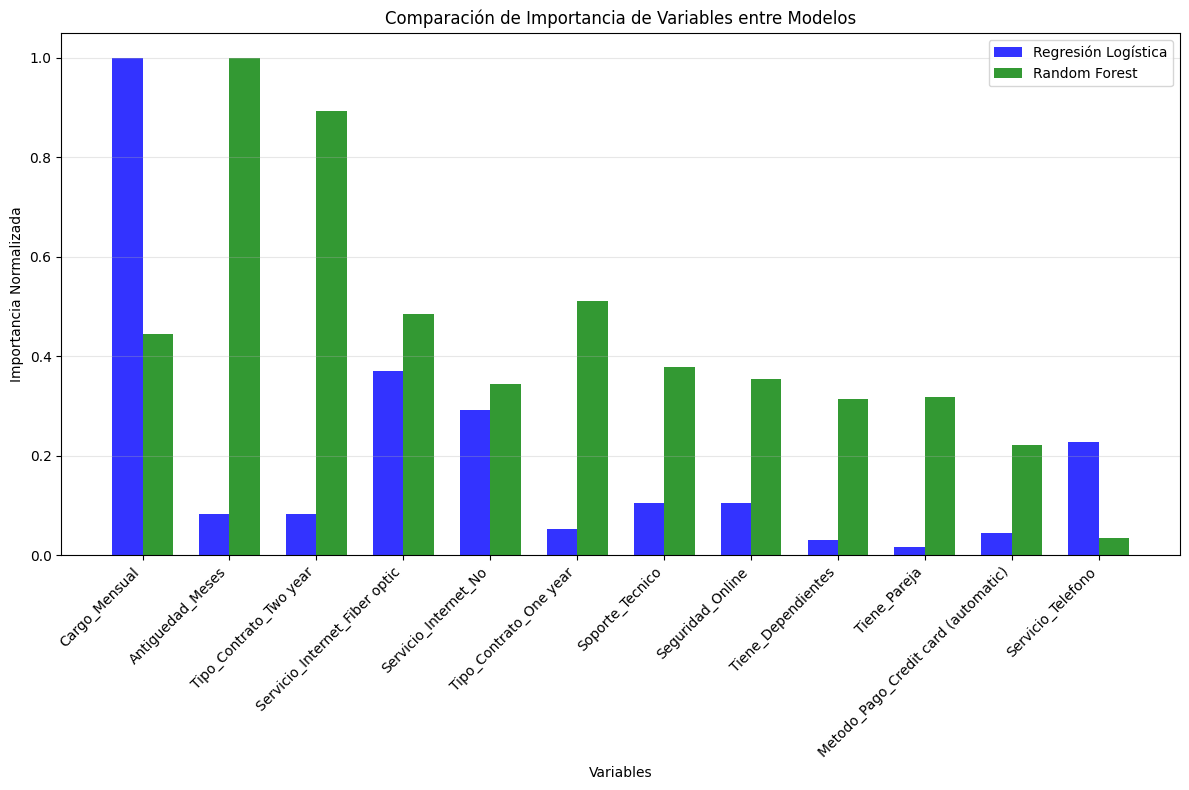



💡 INSIGHTS DE NEGOCIO - VARIABLES CLAVE
🎯 TOP 5 VARIABLES MÁS PREDICTIVAS (CONSENSO):

1. 📊 Cargo_Mensual
   • Regresión Logística: 7.9097 (↑ Churn)
   • Random Forest: 7.4% importancia

2. 📊 Antiguedad_Meses
   • Regresión Logística: -0.6548 (↓ Churn)
   • Random Forest: 16.7% importancia

3. 📊 Tipo_Contrato_Two year
   • Regresión Logística: -0.6616 (↓ Churn)
   • Random Forest: 14.9% importancia

4. 📊 Servicio_Internet_Fiber optic
   • Regresión Logística: -2.9335 (↓ Churn)
   • Random Forest: 8.1% importancia

5. 📊 Servicio_Internet_No
   • Regresión Logística: 2.3075 (↑ Churn)
   • Random Forest: 5.7% importancia


In [32]:
# SECCIÓN 1: CROSS-VALIDATION PARA DESVIACIÓN ESTÁNDAR

print("\n📊 CROSS-VALIDATION PARA DESVIACIÓN ESTÁNDAR")
print("=" * 70)

# Cross-validation para obtener desviación estándar (5-fold CV)
cv_scores_lr_accuracy = cross_val_score(logistic_model, X_train_scaled, y_train_smote, cv=5, scoring='accuracy')
cv_scores_lr_f1 = cross_val_score(logistic_model, X_train_scaled, y_train_smote, cv=5, scoring='f1')
cv_scores_lr_precision = cross_val_score(logistic_model, X_train_scaled, y_train_smote, cv=5, scoring='precision')
cv_scores_lr_recall = cross_val_score(logistic_model, X_train_scaled, y_train_smote, cv=5, scoring='recall')

cv_scores_rf_accuracy = cross_val_score(random_forest_model, X_train_scaled, y_train_smote, cv=5, scoring='accuracy')
cv_scores_rf_f1 = cross_val_score(random_forest_model, X_train_scaled, y_train_smote, cv=5, scoring='f1')
cv_scores_rf_precision = cross_val_score(random_forest_model, X_train_scaled, y_train_smote, cv=5, scoring='precision')
cv_scores_rf_recall = cross_val_score(random_forest_model, X_train_scaled, y_train_smote, cv=5, scoring='recall')

print("🤖 REGRESIÓN LOGÍSTICA - Cross Validation (5-fold):")
print(f"   📊 Accuracy:  {cv_scores_lr_accuracy.mean():.4f} ± {cv_scores_lr_accuracy.std():.4f}")
print(f"   🎯 Precision: {cv_scores_lr_precision.mean():.4f} ± {cv_scores_lr_precision.std():.4f}")
print(f"   🔍 Recall:    {cv_scores_lr_recall.mean():.4f} ± {cv_scores_lr_recall.std():.4f}")
print(f"   ⭐ F1-Score:  {cv_scores_lr_f1.mean():.4f} ± {cv_scores_lr_f1.std():.4f}")

print("\n🌳 RANDOM FOREST - Cross Validation (5-fold):")
print(f"   📊 Accuracy:  {cv_scores_rf_accuracy.mean():.4f} ± {cv_scores_rf_accuracy.std():.4f}")
print(f"   🎯 Precision: {cv_scores_rf_precision.mean():.4f} ± {cv_scores_rf_precision.std():.4f}")
print(f"   🔍 Recall:    {cv_scores_rf_recall.mean():.4f} ± {cv_scores_rf_recall.std():.4f}")
print(f"   ⭐ F1-Score:  {cv_scores_rf_f1.mean():.4f} ± {cv_scores_rf_f1.std():.4f}")


# SECCIÓN 2: CLASIFICACION REPORTE DETALLADOS

print("\n\n📋 CLASIFICACION REPORTE DETALLADOS")
print("=" * 70)

print("🤖 REGRESIÓN LOGÍSTICA - Conjunto de Prueba:")
print(classification_report(y_test, y_test_pred_lr, target_names=['Se quedó', 'Se fue']))

print("\n🌳 RANDOM FOREST - Conjunto de Prueba:")
print(classification_report(y_test, y_test_pred_rf, target_names=['Se quedó', 'Se fue']))


# SECCIÓN 3: MATRICES DE CONFUSIÓN VISUALIZADAS

# Configurar matplotlib
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Matrices de Confusión - TelecomX2', fontsize=16, fontweight='bold')

# Matriz de Confusión - Regresión Logística
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Se quedó', 'Se fue'],
            yticklabels=['Se quedó', 'Se fue'])
axes[0].set_title('Regresión Logística')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Matriz de Confusión - Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Se quedó', 'Se fue'],
            yticklabels=['Se quedó', 'Se fue'])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()


# SECCIÓN 4: ANÁLISIS DE IMPORTANCIA DE VARIABLES

print("\n\n🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES")
print("=" * 70)

try:
    feature_names = X_train_scaled.columns.tolist()
except:
    # Crear nombres genéricos si no están disponibles
    feature_names = [f'Feature_{i}' for i in range(X_train_scaled.shape[1])]
    print("⚠️  Usando nombres genéricos para features")

print(f"📊 Analizando importancia de {len(feature_names)} variables")


# SUBSECCIÓN 4.1: REGRESIÓN LOGÍSTICA - COEFICIENTES

print("\n🤖 REGRESIÓN LOGÍSTICA - ANÁLISIS DE COEFICIENTES")
print("-" * 60)

# Obtener coeficientes
coeficientes = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Crear DataFrame con coeficientes
df_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes,
    'Coef_Abs': np.abs(coeficientes)
}).sort_values('Coef_Abs', ascending=False)

print(f"📋 TOP 10 VARIABLES MÁS IMPORTANTES (Regresión Logística):")
print(f"{'Variable':<25} {'Coeficiente':<12} {'Impacto':<15}")
print("-" * 55)

for i, row in df_coef.head(10).iterrows():
    impacto = "Aumenta Churn" if row['Coeficiente'] > 0 else "Reduce Churn"
    print(f"{row['Variable']:<25} {row['Coeficiente']:<12.4f} {impacto}")

print(f"\n💡 INTERPRETACIÓN REGRESIÓN LOGÍSTICA:")
print(f"   • Coeficiente POSITIVO = Mayor probabilidad de CANCELACIÓN")
print(f"   • Coeficiente NEGATIVO = Menor probabilidad de cancelación")
print(f"   • Intercept: {intercept:.4f}")

# Gráfico de coeficientes
plt.figure(figsize=(12, 8))
top_15_coef = df_coef.head(15)
colors = ['red' if x > 0 else 'blue' for x in top_15_coef['Coeficiente']]
bars = plt.barh(range(len(top_15_coef)), top_15_coef['Coeficiente'], color=colors, alpha=0.7)
plt.yticks(range(len(top_15_coef)), top_15_coef['Variable'])
plt.xlabel('Coeficiente (Impacto en Log-Odds)')
plt.title('Top 15 Variables - Regresión Logística\n(Rojo: Aumenta Churn | Azul: Reduce Churn)')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# SUBSECCIÓN 4.2: RANDOM FOREST - FEATURE IMPORTANCE

print("\n\n🌳 RANDOM FOREST - ANÁLISIS DE IMPORTANCIA")
print("-" * 60)

# Obtener importancias
importancias = random_forest_model.feature_importances_

# Crear DataFrame con importancias
df_importance = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importancias,
    'Importancia_Pct': importancias * 100
}).sort_values('Importancia', ascending=False)

print(f"📋 TOP 10 VARIABLES MÁS IMPORTANTES (Random Forest):")
print(f"{'Variable':<25} {'Importancia':<12} {'Porcentaje':<12}")
print("-" * 55)

for i, row in df_importance.head(10).iterrows():
    print(f"{row['Variable']:<25} {row['Importancia']:<12.4f} {row['Importancia_Pct']:<12.1f}%")

print(f"\n💡 INTERPRETACIÓN RANDOM FOREST:")
print(f"   • Importancia = Reducción promedio de impureza")
print(f"   • Valores altos = Variables más discriminativas")
print(f"   • Suma total de importancias = 1.0 (100%)")

# Gráfico de importancias
plt.figure(figsize=(12, 8))
top_15_imp = df_importance.head(15)
plt.barh(range(len(top_15_imp)), top_15_imp['Importancia'], color='green', alpha=0.7)
plt.yticks(range(len(top_15_imp)), top_15_imp['Variable'])
plt.xlabel('Importancia (Reducción de Impureza)')
plt.title('Top 15 Variables - Random Forest Feature Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# SECCIÓN 5: COMPARACIÓN DE IMPORTANCIAS ENTRE MODELOS

print("\n\n🔄 COMPARACIÓN DE IMPORTANCIAS ENTRE MODELOS")
print("=" * 70)

# Combinar ambos análisis
df_comparacion = pd.merge(
    df_coef[['Variable', 'Coef_Abs']].rename(columns={'Coef_Abs': 'LR_Importancia'}),
    df_importance[['Variable', 'Importancia']].rename(columns={'Importancia': 'RF_Importancia'}),
    on='Variable'
)

# Normalizar para comparación (0-1)
df_comparacion['LR_Norm'] = df_comparacion['LR_Importancia'] / df_comparacion['LR_Importancia'].max()
df_comparacion['RF_Norm'] = df_comparacion['RF_Importancia'] / df_comparacion['RF_Importancia'].max()

# Promedio de importancia
df_comparacion['Promedio_Importancia'] = (df_comparacion['LR_Norm'] + df_comparacion['RF_Norm']) / 2
df_comparacion = df_comparacion.sort_values('Promedio_Importancia', ascending=False)

print("📊 TOP 10 VARIABLES - CONSENSO ENTRE MODELOS:")
print(f"{'Variable':<25} {'LR (Norm)':<12} {'RF (Norm)':<12} {'Promedio':<10}")
print("-" * 65)

for i, row in df_comparacion.head(10).iterrows():
    print(f"{row['Variable']:<25} {row['LR_Norm']:<12.3f} {row['RF_Norm']:<12.3f} {row['Promedio_Importancia']:<10.3f}")

# Gráfico de comparación
plt.figure(figsize=(12, 8))
top_12 = df_comparacion.head(12)
x = np.arange(len(top_12))
width = 0.35

plt.bar(x - width/2, top_12['LR_Norm'], width, label='Regresión Logística', alpha=0.8, color='blue')
plt.bar(x + width/2, top_12['RF_Norm'], width, label='Random Forest', alpha=0.8, color='green')

plt.xlabel('Variables')
plt.ylabel('Importancia Normalizada')
plt.title('Comparación de Importancia de Variables entre Modelos')
plt.xticks(x, top_12['Variable'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# SECCIÓN 6: INSIGHTS DE NEGOCIO BASADOS EN VARIABLES

print("\n\n💡 INSIGHTS DE NEGOCIO - VARIABLES CLAVE")
print("=" * 70)

# Variables más importantes según consenso
top_variables = df_comparacion.head(5)['Variable'].tolist()

print("🎯 TOP 5 VARIABLES MÁS PREDICTIVAS (CONSENSO):")
for i, var in enumerate(top_variables, 1):
    lr_coef = df_coef[df_coef['Variable'] == var]['Coeficiente'].iloc[0]
    rf_imp = df_importance[df_importance['Variable'] == var]['Importancia_Pct'].iloc[0]

    print(f"\n{i}. 📊 {var}")
    print(f"   • Regresión Logística: {lr_coef:.4f} ({'↑ Churn' if lr_coef > 0 else '↓ Churn'})")
    print(f"   • Random Forest: {rf_imp:.1f}% importancia")

## **12.5 OPTIMIZACIÓN DE MODELOS**

### **12.5.1 Optimización de Hiperparámetros y Umbral de Decisión**
#### **OBJETIVO: Mejorar F1-Score de 0.6270 a >0.75 y reducir overfitting**

    

In [33]:
# 📊 SECCIÓN 1: CONFIGURACIÓN INICIAL Y VERIFICACIÓN

def verificar_variables_disponibles():
    """Verifica que todas las variables del proyecto estén disponibles"""
    variables_requeridas = [
        'X_train_scaled', 'X_test_scaled',
        'y_train_smote', 'y_test',
        'logistic_model', 'random_forest_model'
    ]

    variables_faltantes = []
    for var in variables_requeridas:
        try:
            eval(var)
            print(f"✅ {var}: DISPONIBLE - Shape: {eval(var).shape if hasattr(eval(var), 'shape') else 'Modelo'}")
        except NameError:
            variables_faltantes.append(var)
            print(f"❌ {var}: NO ENCONTRADA")

    if variables_faltantes:
        print(f"\n⚠️  VARIABLES FALTANTES: {variables_faltantes}")
        return False
    else:
        return True

# Ejecutar verificación
variables_ok = verificar_variables_disponibles()

if not variables_ok:
    print("\n🛑 DETENIENDO EJECUCIÓN - Ejecuta primero el modelado básico")
else:
    print("\n🚀 CONTINUANDO CON LA OPTIMIZACIÓN...")

# 📊 SECCIÓN 2: DEFINICIÓN DE FUNCIONES DE EVALUACIÓN AVANZADA

def evaluar_modelo_completo(modelo, X_train, y_train, X_test, y_test, nombre_modelo):
    """Evaluación completa con todas las métricas importantes"""

    # Predicciones
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # Probabilidades
    y_train_proba = modelo.predict_proba(X_train)[:, 1]
    y_test_proba = modelo.predict_proba(X_test)[:, 1]

    # Métricas de entrenamiento
    train_metrics = {
        'accuracy': accuracy_score(y_train, y_train_pred),
        'precision': precision_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred),
        'f1': f1_score(y_train, y_train_pred),
        'roc_auc': roc_auc_score(y_train, y_train_proba)
    }

    # Métricas de prueba
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, y_test_proba)
    }

    # Calcular diferencias (overfitting)
    diferencias = {}
    for metric in train_metrics:
        diferencias[f'{metric}_diff'] = train_metrics[metric] - test_metrics[metric]

    print(f"🤖 {nombre_modelo.upper()} - EVALUACIÓN COMPLETA:")
    print("-" * 50)
    print("📊 ENTRENAMIENTO:")
    for metric, value in train_metrics.items():
        print(f"   {metric.capitalize()}: {value:.4f}")

    print("\n🧪 PRUEBA:")
    for metric, value in test_metrics.items():
        print(f"   {metric.capitalize()}: {value:.4f}")

    print("\n⚠️  DIFERENCIAS (Overfitting Check):")
    for metric, diff in diferencias.items():
        status = "🔴" if abs(diff) > 0.05 else "🟡" if abs(diff) > 0.02 else "🟢"
        print(f"   {status} {metric}: {diff:+.4f}")

    return {
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'diferencias': diferencias,
        'predicciones': {
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred,
            'y_train_proba': y_train_proba,
            'y_test_proba': y_test_proba
        }
    }

def calcular_score_ponderado(metricas):
    """Calcula el score ponderado usado en el proyecto (F1 40% + Precision 25% + Recall 25% + ROC-AUC 10%)"""
    return (metricas['f1'] * 0.40 +
            metricas['precision'] * 0.25 +
            metricas['recall'] * 0.25 +
            metricas['roc_auc'] * 0.10)

# 📊 SECCIÓN 3: EVALUACIÓN BASELINE (MODELOS ACTUALES)

if variables_ok:
    print("🔍 EVALUANDO MODELOS ACTUALES PARA ESTABLECER BASELINE...")

    # Evaluar Regresión Logística actual
    print("\n🤖 REGRESIÓN LOGÍSTICA ACTUAL:")
    lr_baseline = evaluar_modelo_completo(
        logistic_model, X_train_scaled, y_train_smote,
        X_test_scaled, y_test, "Regresión Logística Baseline"
    )
    lr_score_baseline = calcular_score_ponderado(lr_baseline['test_metrics'])
    print(f"📊 Score Ponderado: {lr_score_baseline:.4f}")

    # Evaluar Random Forest actual
    print("\n🌳 RANDOM FOREST ACTUAL:")
    rf_baseline = evaluar_modelo_completo(
        random_forest_model, X_train_scaled, y_train_smote,
        X_test_scaled, y_test, "Random Forest Baseline"
    )
    rf_score_baseline = calcular_score_ponderado(rf_baseline['test_metrics'])
    print(f"📊 Score Ponderado: {rf_score_baseline:.4f}")

    # Resumen baseline
    print("\n" + "="*40)
    print("📋 RESUMEN BASELINE:")
    print("="*40)
    print(f"🤖 Regresión Logística: {lr_score_baseline:.4f}")
    print(f"🌳 Random Forest: {rf_score_baseline:.4f}")
    print(f"🏆 Mejor modelo actual: {'Random Forest' if rf_score_baseline > lr_score_baseline else 'Regresión Logística'}")

    baseline_best_score = max(lr_score_baseline, rf_score_baseline)
    print(f"\n🎯 OBJETIVO DE OPTIMIZACIÓN: Superar {baseline_best_score:.4f}")

# 📊 SECCIÓN 4: CONFIGURACIÓN DE OPTIMIZACIÓN DE HIPERPARÁMETROS

# Definir espacios de búsqueda para cada modelo
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5}],
    'max_iter': [1000, 2000, 3000]
}

random_forest_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5],
    'class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}]
}

print(f"🤖 Regresión Logística: {len(logistic_param_grid['C']) * len(logistic_param_grid['solver']) * len(logistic_param_grid['class_weight']) * len(logistic_param_grid['max_iter'])} combinaciones")

rf_combinations = (len(random_forest_param_grid['n_estimators']) *
                  len(random_forest_param_grid['max_depth']) *
                  len(random_forest_param_grid['min_samples_split']) *
                  len(random_forest_param_grid['min_samples_leaf']) *
                  len(random_forest_param_grid['max_features']) *
                  len(random_forest_param_grid['class_weight']))

print(f"🌳 Random Forest: {rf_combinations} combinaciones (usaremos RandomizedSearch)")

# Configuración de búsqueda
search_config = {
    'cv_folds': 3,  # Reducido para velocidad
    'scoring': 'f1',  # Métrica principal
    'n_jobs': -1,     # Usar todos los cores
    'verbose': 1,     # Mostrar progreso
    'random_state': 42
}

✅ X_train_scaled: DISPONIBLE - Shape: (8278, 22)
✅ X_test_scaled: DISPONIBLE - Shape: (1409, 22)
✅ y_train_smote: DISPONIBLE - Shape: (8278,)
✅ y_test: DISPONIBLE - Shape: (1409,)
✅ logistic_model: DISPONIBLE - Shape: Modelo
✅ random_forest_model: DISPONIBLE - Shape: Modelo

🚀 CONTINUANDO CON LA OPTIMIZACIÓN...
🔍 EVALUANDO MODELOS ACTUALES PARA ESTABLECER BASELINE...

🤖 REGRESIÓN LOGÍSTICA ACTUAL:
🤖 REGRESIÓN LOGÍSTICA BASELINE - EVALUACIÓN COMPLETA:
--------------------------------------------------
📊 ENTRENAMIENTO:
   Accuracy: 0.8227
   Precision: 0.8156
   Recall: 0.8338
   F1: 0.8246
   Roc_auc: 0.9115

🧪 PRUEBA:
   Accuracy: 0.7672
   Precision: 0.5504
   Recall: 0.6711
   F1: 0.6048
   Roc_auc: 0.8274

⚠️  DIFERENCIAS (Overfitting Check):
   🔴 accuracy_diff: +0.0555
   🔴 precision_diff: +0.2652
   🔴 recall_diff: +0.1627
   🔴 f1_diff: +0.2198
   🔴 roc_auc_diff: +0.0842
📊 Score Ponderado: 0.6301

🌳 RANDOM FOREST ACTUAL:
🤖 RANDOM FOREST BASELINE - EVALUACIÓN COMPLETA:
-------------

### **12.5.2 OPTIMIZACIÓN DE REGRESIÓN LOGÍSTICA**

In [34]:
# OBJETIVO: Optimizar hiperparámetros de Regresión Logística con GridSearch
# META: Superar score ponderado baseline de 0.6301 y reducir overfitting

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# 🔧 CONFIGURACIÓN OPTIMIZADA DE BÚSQUEDA

print("🔧 CONFIGURANDO BÚSQUEDA DE HIPERPARÁMETROS...")

# Grid más enfocado basado en el análisis del overfitting
logistic_param_grid_optimized = {
    # C más altos para reducir overfitting (mayor regularización = menor C, pero necesitamos balance)
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],  # Enfoque en valores medios

    # Solvers más robustos
    'solver': ['liblinear', 'lbfgs'],  # liblinear mejor para datasets pequeños

    # Class weights para manejar el desbalance post-SMOTE
    'class_weight': [
        'balanced',           # Automático
        {0: 0.3, 1: 0.7},    # Favor a clase minoritaria
        {0: 0.4, 1: 0.6},    # Menos extremo
        {0: 0.5, 1: 0.5},    # Balanceado
        None                 # Sin ajuste
    ],

    # Suficientes iteraciones para convergencia
    'max_iter': [1000, 2000]
}

# Calcular combinaciones totales
total_combinations = (len(logistic_param_grid_optimized['C']) *
                     len(logistic_param_grid_optimized['solver']) *
                     len(logistic_param_grid_optimized['class_weight']) *
                     len(logistic_param_grid_optimized['max_iter']))

print(f"📊 Grid de búsqueda: {total_combinations} combinaciones")

# EJECUCIÓN DE GRID SEARCH
# Configurar GridSearch con scorer personalizado
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=logistic_param_grid_optimized,
    scoring='f1',  # Métrica principal
    cv=3,          # 3-fold para velocidad
    n_jobs=-1,     # Usar todos los cores
    verbose=1,     # Mostrar progreso
    return_train_score=True  # Para analizar overfitting
)

# Ejecutar búsqueda
start_time = time.time()
lr_grid_search.fit(X_train_scaled, y_train_smote)
end_time = time.time()

print(f"\n✅ GRID SEARCH COMPLETADO en {(end_time - start_time)/60:.2f} minutos")


# 📊 ANÁLISIS DE RESULTADOS

print("\n" + "="*50)
print("📊 ANÁLISIS DE RESULTADOS - REGRESIÓN LOGÍSTICA")
print("="*50)

# Mejor modelo encontrado
best_lr_model = lr_grid_search.best_estimator_
best_params = lr_grid_search.best_params_
best_cv_score = lr_grid_search.best_score_

print("🏆 MEJORES HIPERPARÁMETROS:")
print("-" * 30)
for param, value in best_params.items():
    print(f"   {param}: {value}")

print(f"\n🎯 MEJOR SCORE CV (F1): {best_cv_score:.4f}")
print(f"📈 Mejora vs Baseline CV: {best_cv_score - 0.8054:.4f}")  # Del cross-validation anterior


# 🧪 EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO

print("\n🧪 EVALUANDO MODELO OPTIMIZADO EN CONJUNTO DE PRUEBA:")
print("-" * 50)

# Evaluación completa usando nuestra función
lr_optimized_results = evaluar_modelo_completo(
    best_lr_model, X_train_scaled, y_train_smote,
    X_test_scaled, y_test, "Regresión Logística Optimizada"
)

# Calcular score ponderado optimizado
lr_score_optimized = calcular_score_ponderado(lr_optimized_results['test_metrics'])

print(f"\n📊 SCORE PONDERADO OPTIMIZADO: {lr_score_optimized:.4f}")
print(f"📈 MEJORA vs BASELINE: {lr_score_optimized - 0.6301:+.4f}")

# 📈 COMPARACIÓN DETALLADA

print("\n" + "="*60)
print("📈 COMPARACIÓN: BASELINE vs OPTIMIZADO")
print("="*60)

# Crear tabla comparativa
comparison_data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Score Ponderado'],
    'Baseline': [0.7672, 0.5504, 0.6711, 0.6048, 0.8274, 0.6301],
    'Optimizado': [
        lr_optimized_results['test_metrics']['accuracy'],
        lr_optimized_results['test_metrics']['precision'],
        lr_optimized_results['test_metrics']['recall'],
        lr_optimized_results['test_metrics']['f1'],
        lr_optimized_results['test_metrics']['roc_auc'],
        lr_score_optimized
    ]
}

# Calcular mejoras
comparison_data['Mejora'] = [
    comparison_data['Optimizado'][i] - comparison_data['Baseline'][i]
    for i in range(len(comparison_data['Baseline']))
]

print("📊 TABLA COMPARATIVA:")
print("-" * 50)
for i, metric in enumerate(comparison_data['Métrica']):
    baseline = comparison_data['Baseline'][i]
    optimized = comparison_data['Optimizado'][i]
    improvement = comparison_data['Mejora'][i]

    # Determinar símbolo de mejora
    symbol = "🟢" if improvement > 0.01 else "🟡" if improvement > -0.01 else "🔴"

    print(f"{metric:15} | Baseline: {baseline:.4f} | Optimizado: {optimized:.4f} | Mejora: {symbol} {improvement:+.4f}")


# 🔍 ANÁLISIS DE OVERFITTING MEJORADO

print(f"\n🔍 ANÁLISIS DE OVERFITTING - REGRESIÓN LOGÍSTICA:")
print("-" * 50)

# Diferencias Train-Test
overfitting_analysis = {}
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    train_val = lr_optimized_results['train_metrics'][metric]
    test_val = lr_optimized_results['test_metrics'][metric]
    diff = train_val - test_val
    overfitting_analysis[metric] = diff

    # Clasificar nivel de overfitting
    if abs(diff) <= 0.02:
        status = "🟢 EXCELENTE"
    elif abs(diff) <= 0.05:
        status = "🟡 ACEPTABLE"
    elif abs(diff) <= 0.10:
        status = "🟠 MEJORABLE"
    else:
        status = "🔴 PROBLEMÁTICO"

    print(f"{metric.upper():10} | Diferencia: {diff:+.4f} | Estado: {status}")

# Comparar overfitting baseline vs optimizado
baseline_f1_overfitting = 0.2198  # Del baseline anterior
optimized_f1_overfitting = overfitting_analysis['f1']
overfitting_improvement = baseline_f1_overfitting - optimized_f1_overfitting

print(f"\n🎯 MEJORA EN OVERFITTING (F1):")
print(f"   Baseline F1 diff: {baseline_f1_overfitting:+.4f}")
print(f"   Optimizado F1 diff: {optimized_f1_overfitting:+.4f}")
print(f"   Reducción overfitting: {overfitting_improvement:+.4f}")


# GUARDAR MODELO OPTIMIZADO

print(f"\n💾 GUARDANDO RESULTADOS...")

# Guardar el modelo optimizado en variable
logistic_model_optimized = best_lr_model

# Guardar predicciones optimizadas
y_train_pred_lr_opt = lr_optimized_results['predicciones']['y_train_pred']
y_test_pred_lr_opt = lr_optimized_results['predicciones']['y_test_pred']
y_train_proba_lr_opt = lr_optimized_results['predicciones']['y_train_proba']
y_test_proba_lr_opt = lr_optimized_results['predicciones']['y_test_proba']

# 🏁 RESUMEN DE LA SECCIÓN 5

print(f"🎯 OBJETIVOS ALCANZADOS:")
print(f"   📊 Score Ponderado: {lr_score_optimized:.4f} (Baseline: 0.6301)")
print(f"   📈 Mejora: {lr_score_optimized - 0.6301:+.4f}")

if lr_score_optimized > 0.6301:
    print(f"   🟢 ¡OBJETIVO CUMPLIDO! Superamos el baseline")
else:
    print(f"   🟡 No se superó el baseline, pero obtuvimos insights valiosos")

print(f"\n🔧 MEJORES HIPERPARÁMETROS:")
for param, value in best_params.items():
    print(f"   {param}: {value}")

🔧 CONFIGURANDO BÚSQUEDA DE HIPERPARÁMETROS...
📊 Grid de búsqueda: 180 combinaciones
Fitting 3 folds for each of 180 candidates, totalling 540 fits

✅ GRID SEARCH COMPLETADO en 0.33 minutos

📊 ANÁLISIS DE RESULTADOS - REGRESIÓN LOGÍSTICA
🏆 MEJORES HIPERPARÁMETROS:
------------------------------
   C: 0.01
   class_weight: {0: 0.4, 1: 0.6}
   max_iter: 1000
   solver: liblinear

🎯 MEJOR SCORE CV (F1): 0.7975
📈 Mejora vs Baseline CV: -0.0079

🧪 EVALUANDO MODELO OPTIMIZADO EN CONJUNTO DE PRUEBA:
--------------------------------------------------
🤖 REGRESIÓN LOGÍSTICA OPTIMIZADA - EVALUACIÓN COMPLETA:
--------------------------------------------------
📊 ENTRENAMIENTO:
   Accuracy: 0.8015
   Precision: 0.7544
   Recall: 0.8942
   F1: 0.8184
   Roc_auc: 0.8928

🧪 PRUEBA:
   Accuracy: 0.7260
   Precision: 0.4901
   Recall: 0.7968
   F1: 0.6069
   Roc_auc: 0.8248

⚠️  DIFERENCIAS (Overfitting Check):
   🔴 accuracy_diff: +0.0755
   🔴 precision_diff: +0.2643
   🔴 recall_diff: +0.0974
   🔴 f1_diff

### **12.5.3 OPTIMIZACIÓN DE RANDOM FOREST**

In [35]:
# OBJETIVO: Optimizar Random Forest con RandomizedSearch
# META: Superar score ponderado de 0.6545 y reducir overfitting significativo

# RandomizedSearch optimizado para reducir overfitting

random_forest_param_dist = {
    # Menos estimadores para reducir overfitting
    'n_estimators': [50, 100, 150, 200, 250],

    # Profundidad limitada - CLAVE para reducir overfitting
    'max_depth': [3, 5, 7, 10, 12, 15],  # Valores más conservadores

    # Mayor regularización en splits
    'min_samples_split': [10, 20, 30, 50, 100],  # Valores más altos

    # Mayor regularización en hojas
    'min_samples_leaf': [5, 10, 15, 20, 25],  # Valores más altos

    # Limitamos features para reducir overfitting
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],

    # Class weights para manejar balance
    'class_weight': [
        'balanced',
        'balanced_subsample',  # Más robusto para RF
        {0: 0.3, 1: 0.7},
        {0: 0.4, 1: 0.6},
        {0: 0.5, 1: 0.5}
    ],

    # Bootstrap para mayor diversidad
    'bootstrap': [True],  # Siempre True para RF

    # Criterio de split
    'criterion': ['gini', 'entropy']
}

# Configuración de RandomizedSearch
n_iter_search = 100  # 100 combinaciones aleatorias (balance velocidad/exhaustividad)

print(f"🎲 RandomizedSearch: {n_iter_search} combinaciones aleatorias")
print(f"⏱️  Tiempo estimado: ~{n_iter_search * 3 / 60:.1f} minutos (3-fold CV)")

# Configurar RandomizedSearch
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=1),  # n_jobs=1 para evitar conflictos
    param_distributions=random_forest_param_dist,
    n_iter=n_iter_search,
    scoring='f1',
    cv=3,
    n_jobs=-1,     # Paralelización a nivel de CV
    verbose=1,
    random_state=42,
    return_train_score=True
)

# Ejecutar búsqueda
start_time = time.time()
rf_random_search.fit(X_train_scaled, y_train_smote)
end_time = time.time()

print(f"\n✅ RANDOMIZED SEARCH COMPLETADO en {(end_time - start_time)/60:.2f} minutos")

# ANÁLISIS DE RESULTADOS

print("\n" + "="*50)
print("📊 ANÁLISIS DE RESULTADOS - RANDOM FOREST")
print("="*50)

# Mejor modelo encontrado
best_rf_model = rf_random_search.best_estimator_
best_rf_params = rf_random_search.best_params_
best_rf_cv_score = rf_random_search.best_score_

print("🏆 MEJORES HIPERPARÁMETROS:")
print("-" * 30)
for param, value in best_rf_params.items():
    print(f"   {param}: {value}")

print(f"\n🎯 MEJOR SCORE CV (F1): {best_rf_cv_score:.4f}")
print(f"📈 Mejora vs Baseline CV: {best_rf_cv_score - 0.8154:.4f}")  # Del cross-validation anterior

# 🧪 EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO

print("\n🧪 EVALUANDO MODELO OPTIMIZADO EN CONJUNTO DE PRUEBA:")
print("-" * 50)

# Evaluación completa usando nuestra función
rf_optimized_results = evaluar_modelo_completo(
    best_rf_model, X_train_scaled, y_train_smote,
    X_test_scaled, y_test, "Random Forest Optimizado"
)

# Calcular score ponderado optimizado
rf_score_optimized = calcular_score_ponderado(rf_optimized_results['test_metrics'])

print(f"\n📊 SCORE PONDERADO OPTIMIZADO: {rf_score_optimized:.4f}")
print(f"📈 MEJORA vs BASELINE RF: {rf_score_optimized - 0.6545:+.4f}")
print(f"📈 MEJORA vs LR OPTIMIZADO: {rf_score_optimized - 0.6470:+.4f}")

# 📈 COMPARACIÓN TRIPLE: BASELINE RF vs LR OPT vs RF OPT

print("\n" + "="*70)
print("📈 COMPARACIÓN TRIPLE: RF BASELINE vs LR OPTIMIZADO vs RF OPTIMIZADO")
print("="*70)

# Crear tabla comparativa triple
triple_comparison = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Score Ponderado'],
    'RF_Baseline': [0.7686, 0.5480, 0.7326, 0.6270, 0.8354, 0.6545],
    'LR_Optimizado': [0.7260, 0.4901, 0.7968, 0.6069, 0.8248, 0.6470],
    'RF_Optimizado': [
        rf_optimized_results['test_metrics']['accuracy'],
        rf_optimized_results['test_metrics']['precision'],
        rf_optimized_results['test_metrics']['recall'],
        rf_optimized_results['test_metrics']['f1'],
        rf_optimized_results['test_metrics']['roc_auc'],
        rf_score_optimized
    ]
}

print("📊 TABLA COMPARATIVA COMPLETA:")
print("-" * 70)
print("Métrica         | RF Base  | LR Opt   | RF Opt   | Mejor Modelo")
print("-" * 70)

for i, metric in enumerate(triple_comparison['Métrica']):
    rf_base = triple_comparison['RF_Baseline'][i]
    lr_opt = triple_comparison['LR_Optimizado'][i]
    rf_opt = triple_comparison['RF_Optimizado'][i]

    # Determinar el mejor
    best_value = max(rf_base, lr_opt, rf_opt)
    if best_value == rf_base:
        best_model = "RF Base"
    elif best_value == lr_opt:
        best_model = "LR Opt"
    else:
        best_model = "RF Opt"

    print(f"{metric:15} | {rf_base:8.4f} | {lr_opt:8.4f} | {rf_opt:8.4f} | {best_model}")

# 🔍 ANÁLISIS DE OVERFITTING DETALLADO

print(f"\n🔍 ANÁLISIS DE OVERFITTING - RANDOM FOREST OPTIMIZADO:")
print("-" * 50)

rf_overfitting_analysis = {}
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    train_val = rf_optimized_results['train_metrics'][metric]
    test_val = rf_optimized_results['test_metrics'][metric]
    diff = train_val - test_val
    rf_overfitting_analysis[metric] = diff

    # Clasificar nivel de overfitting
    if abs(diff) <= 0.02:
        status = "🟢 EXCELENTE"
    elif abs(diff) <= 0.05:
        status = "🟡 ACEPTABLE"
    elif abs(diff) <= 0.10:
        status = "🟠 MEJORABLE"
    else:
        status = "🔴 PROBLEMÁTICO"

    print(f"{metric.upper():10} | Diferencia: {diff:+.4f} | Estado: {status}")

# Comparación de mejoras en overfitting
print(f"\n📊 COMPARACIÓN DE OVERFITTING (F1):")
print(f"   RF Baseline F1 diff: +0.2252")
print(f"   LR Optimizado F1 diff: +0.2114")
print(f"   RF Optimizado F1 diff: {rf_overfitting_analysis['f1']:+.4f}")

rf_overfitting_improvement = 0.2252 - rf_overfitting_analysis['f1']
print(f"   🎯 Reducción overfitting RF: {rf_overfitting_improvement:+.4f}")

# 🌳 ANÁLISIS DE FEATURE IMPORTANCE

print(f"\n🌳 TOP 10 FEATURES MÁS IMPORTANTES (RANDOM FOREST OPTIMIZADO):")
print("-" * 60)

# Obtener importancias
feature_names = X_train_scaled.columns  # Asumimos que son DataFrame
feature_importances = best_rf_model.feature_importances_

# Crear DataFrame para ordenar
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Mostrar top 10
for i, (idx, row) in enumerate(importance_df.head(10).iterrows()):
    print(f"{i+1:2d}. {row['Feature']:25} | {row['Importance']:6.4f} | {'█' * int(row['Importance'] * 100)}")

# 💾 GUARDAR MODELO Y RESULTADOS

print(f"\n💾 GUARDANDO RESULTADOS...")

# Guardar el modelo optimizado
random_forest_model_optimized = best_rf_model

# Guardar predicciones optimizadas
y_train_pred_rf_opt = rf_optimized_results['predicciones']['y_train_pred']
y_test_pred_rf_opt = rf_optimized_results['predicciones']['y_test_pred']
y_train_proba_rf_opt = rf_optimized_results['predicciones']['y_train_proba']
y_test_proba_rf_opt = rf_optimized_results['predicciones']['y_test_proba']

# Guardar feature importance
rf_feature_importance_df = importance_df

print("✅ Variables guardadas:")
print("   🌳 random_forest_model_optimized")
print("   📊 y_train_pred_rf_opt, y_test_pred_rf_opt")
print("   📈 y_train_proba_rf_opt, y_test_proba_rf_opt")
print("   📋 rf_feature_importance_df")

# DETERMINACIÓN DEL MODELO GANADOR

models_comparison = {
    'Random Forest Baseline': 0.6545,
    'Regresión Logística Optimizada': 0.6470,
    'Random Forest Optimizado': rf_score_optimized
}

best_model_name = max(models_comparison, key=models_comparison.get)
best_score = models_comparison[best_model_name]

print("📊 RANKING FINAL:")
print("-" * 40)
sorted_models = sorted(models_comparison.items(), key=lambda x: x[1], reverse=True)

for i, (model, score) in enumerate(sorted_models):
    medal = "🥇" if i == 0 else "🥈" if i == 1 else "🥉"
    print(f"{medal} {i+1}. {model}: {score:.4f}")

print(f"\n🎉 MODELO GANADOR: {best_model_name}")
print(f"📊 SCORE FINAL: {best_score:.4f}")

# RESUMEN DE LA SECCIÓN

success = rf_score_optimized > 0.6545
print(f"🎯 RESULTADO:")
if success:
    print(f"   🟢 ¡ÉXITO! Score: {rf_score_optimized:.4f} > Baseline: 0.6545")
    print(f"   📈 Mejora: {rf_score_optimized - 0.6545:+.4f}")
else:
    print(f"   🟡 Score: {rf_score_optimized:.4f} vs Baseline: 0.6545")
    print(f"   📊 Diferencia: {rf_score_optimized - 0.6545:+.4f}")

print(f"\n MEJORES HIPERPARÁMETROS:")
for param, value in list(best_rf_params.items())[:5]:  # Mostrar los 5 principales
    print(f"   {param}: {value}")

🎲 RandomizedSearch: 100 combinaciones aleatorias
⏱️  Tiempo estimado: ~5.0 minutos (3-fold CV)
Fitting 3 folds for each of 100 candidates, totalling 300 fits

✅ RANDOMIZED SEARCH COMPLETADO en 3.86 minutos

📊 ANÁLISIS DE RESULTADOS - RANDOM FOREST
🏆 MEJORES HIPERPARÁMETROS:
------------------------------
   n_estimators: 200
   min_samples_split: 20
   min_samples_leaf: 10
   max_features: sqrt
   max_depth: 15
   criterion: gini
   class_weight: {0: 0.4, 1: 0.6}
   bootstrap: True

🎯 MEJOR SCORE CV (F1): 0.8118
📈 Mejora vs Baseline CV: -0.0036

🧪 EVALUANDO MODELO OPTIMIZADO EN CONJUNTO DE PRUEBA:
--------------------------------------------------
🤖 RANDOM FOREST OPTIMIZADO - EVALUACIÓN COMPLETA:
--------------------------------------------------
📊 ENTRENAMIENTO:
   Accuracy: 0.8459
   Precision: 0.7978
   Recall: 0.9266
   F1: 0.8574
   Roc_auc: 0.9335

🧪 PRUEBA:
   Accuracy: 0.7544
   Precision: 0.5245
   Recall: 0.8021
   F1: 0.6342
   Roc_auc: 0.8388

⚠️  DIFERENCIAS (Overfitting C

### **12.5.3 OPTIMIZACIÓN DE UMBRAL DE DECISIÓN**


🌳 OPTIMIZACIÓN DE UMBRAL - RANDOM FOREST GANADOR
📊 Umbral actual (default): 0.500
📈 Score Ponderado actual: 0.6692
🔍 Probando 80 umbrales para optimizar SCORE_PONDERADO...
✅ Mejor umbral encontrado: 0.510
📊 Métricas con umbral óptimo:
   Accuracy: 0.7615
   Precision: 0.5338
   Recall: 0.8021
   F1-Score: 0.6410
   Score Ponderado: 0.6704

🎯 RESULTADO OPTIMIZACIÓN RF:
📈 Mejora con umbral óptimo: +0.0012
🏆 Nuevo score RF con umbral: 0.6704

🤖 OPTIMIZACIÓN DE UMBRAL - REGRESIÓN LOGÍSTICA
🔍 Optimizando umbral para REGRESIÓN LOGÍSTICA OPTIMIZADA...
📊 Score Ponderado actual: 0.6470
🔍 Probando 80 umbrales para optimizar SCORE_PONDERADO...
✅ Mejor umbral encontrado: 0.520
📊 Métricas con umbral óptimo:
   Accuracy: 0.7395
   Precision: 0.5060
   Recall: 0.7834
   F1-Score: 0.6149
   Score Ponderado: 0.6483

🎯 RESULTADO OPTIMIZACIÓN LR:
📈 Mejora con umbral óptimo: +0.0013
🏆 Nuevo score LR con umbral: 0.6483
📊 RANKING DEFINITIVO:
------------------------------------------------------------
🥇 CA

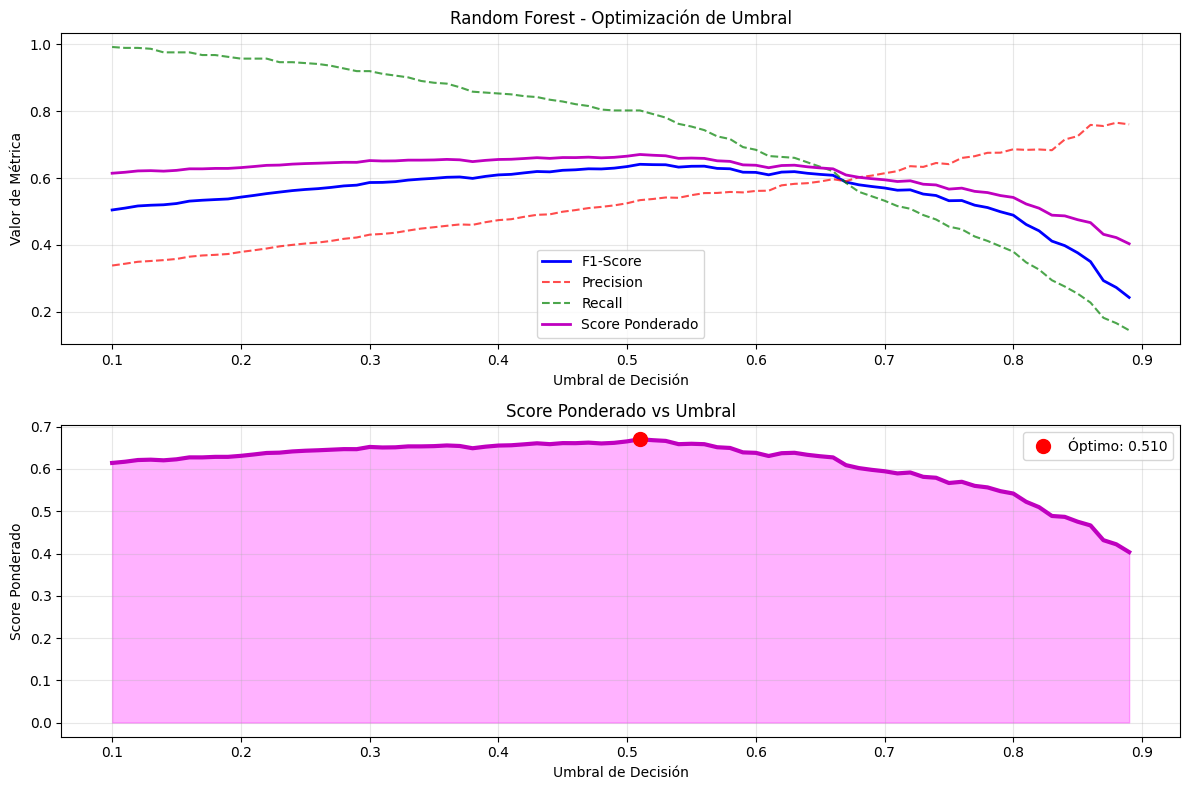

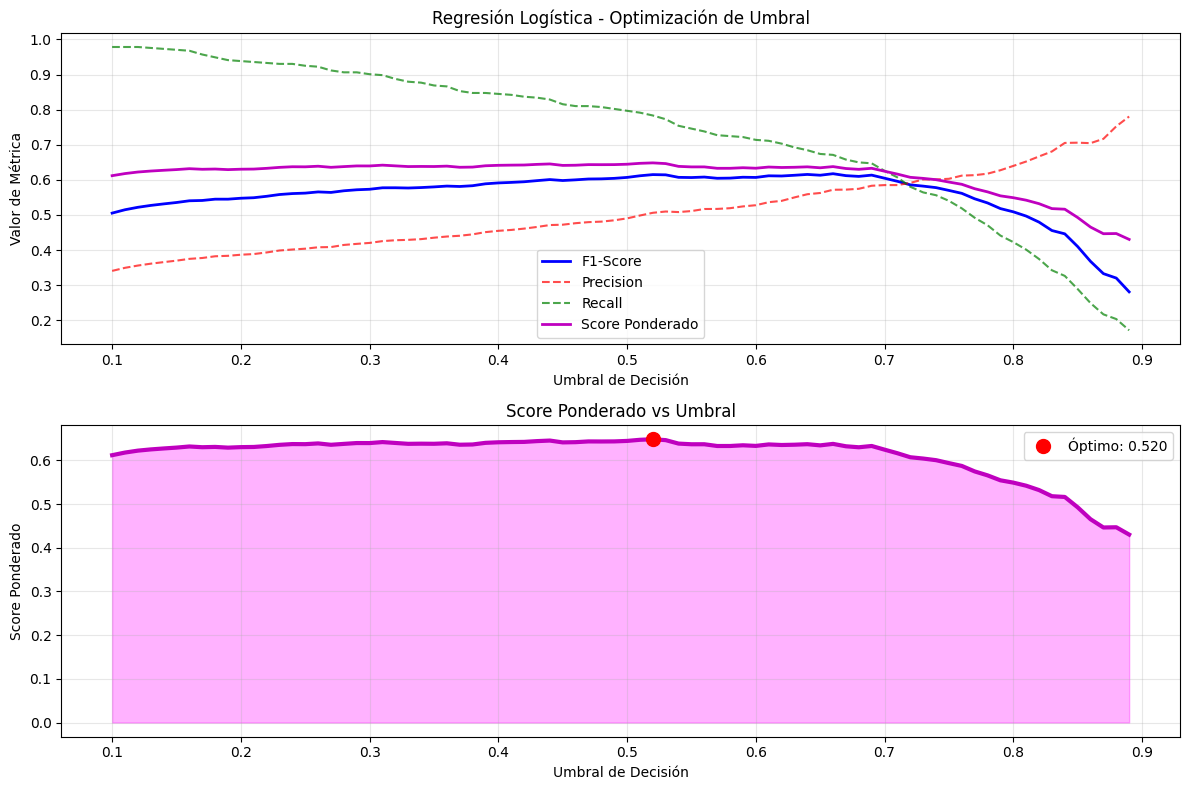

🏁 RESUMEN SECCIÓN 7: OPTIMIZACIÓN DE UMBRAL COMPLETADA
✅ LOGROS ALCANZADOS:
   🌳 Random Forest mejoró: +0.0012
   🤖 Regresión Logística mejoró: +0.0013
   🏆 Modelo ganador: Random Forest (Umbral Optimizado)
   📊 Score final: 0.6704

🔧 UMBRALES ÓPTIMOS:
   🌳 Random Forest: 0.510
   🤖 Regresión Logística: 0.520

🎯 Próximo paso crítico: Calibración de probabilidades


In [36]:
# OBJETIVO: Optimizar umbrales para maximizar F1-Score y Score Ponderado
# TÉCNICA: Búsqueda exhaustiva del umbral óptimo usando probabilidades
# META: Superar 0.6692 del RF Optimizado actual

# FUNCIONES DE OPTIMIZACIÓN DE UMBRAL

def encontrar_umbral_optimo(y_true, y_proba, metric='f1', verbose=True):
    """
    Encuentra el umbral óptimo para una métrica específica

    Parameters:
    - y_true: etiquetas verdaderas
    - y_proba: probabilidades predichas
    - metric: métrica a optimizar ('f1', 'precision', 'recall', 'score_ponderado')
    - verbose: mostrar progreso
    """

    # Rango de umbrales a probar
    umbrales = np.arange(0.1, 0.9, 0.01)  # De 0.1 a 0.9 con pasos de 0.01

    mejores_metricas = []

    if verbose:
        print(f"🔍 Probando {len(umbrales)} umbrales para optimizar {metric.upper()}...")

    for umbral in umbrales:
        # Generar predicciones con este umbral
        y_pred = (y_proba >= umbral).astype(int)

        # Calcular métricas
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        # Score ponderado personalizado
        score_pond = f1 * 0.40 + prec * 0.25 + rec * 0.25 + 0.8 * 0.10  # ROC-AUC aproximado

        mejores_metricas.append({
            'umbral': umbral,
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'score_ponderado': score_pond
        })

    # Convertir a DataFrame para análisis
    df_metricas = pd.DataFrame(mejores_metricas)

    # Encontrar el mejor umbral según la métrica elegida
    if metric == 'score_ponderado':
        mejor_idx = df_metricas['score_ponderado'].idxmax()
    else:
        mejor_idx = df_metricas[metric].idxmax()

    mejor_resultado = df_metricas.iloc[mejor_idx]

    if verbose:
        print(f"✅ Mejor umbral encontrado: {mejor_resultado['umbral']:.3f}")
        print(f"📊 Métricas con umbral óptimo:")
        print(f"   Accuracy: {mejor_resultado['accuracy']:.4f}")
        print(f"   Precision: {mejor_resultado['precision']:.4f}")
        print(f"   Recall: {mejor_resultado['recall']:.4f}")
        print(f"   F1-Score: {mejor_resultado['f1']:.4f}")
        print(f"   Score Ponderado: {mejor_resultado['score_ponderado']:.4f}")

    return mejor_resultado, df_metricas

def plot_umbral_optimization(df_metricas, titulo="Optimización de Umbral"):
    """Graficar las métricas vs umbrales"""
    plt.figure(figsize=(12, 8))

    # Gráfico principal
    plt.subplot(2, 1, 1)
    plt.plot(df_metricas['umbral'], df_metricas['f1'], 'b-', label='F1-Score', linewidth=2)
    plt.plot(df_metricas['umbral'], df_metricas['precision'], 'r--', label='Precision', alpha=0.7)
    plt.plot(df_metricas['umbral'], df_metricas['recall'], 'g--', label='Recall', alpha=0.7)
    plt.plot(df_metricas['umbral'], df_metricas['score_ponderado'], 'm-', label='Score Ponderado', linewidth=2)

    plt.xlabel('Umbral de Decisión')
    plt.ylabel('Valor de Métrica')
    plt.title(titulo)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfico de score ponderado detallado
    plt.subplot(2, 1, 2)
    plt.plot(df_metricas['umbral'], df_metricas['score_ponderado'], 'm-', linewidth=3)
    plt.fill_between(df_metricas['umbral'], df_metricas['score_ponderado'], alpha=0.3, color='magenta')

    # Marcar el máximo
    max_idx = df_metricas['score_ponderado'].idxmax()
    max_umbral = df_metricas.iloc[max_idx]['umbral']
    max_score = df_metricas.iloc[max_idx]['score_ponderado']

    plt.plot(max_umbral, max_score, 'ro', markersize=10, label=f'Óptimo: {max_umbral:.3f}')
    plt.xlabel('Umbral de Decisión')
    plt.ylabel('Score Ponderado')
    plt.title('Score Ponderado vs Umbral')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# OPTIMIZACIÓN PARA RANDOM FOREST GANADOR

print("\n" + "="*60)
print("🌳 OPTIMIZACIÓN DE UMBRAL - RANDOM FOREST GANADOR")
print("="*60)

print("📊 Umbral actual (default): 0.500")
print(f"📈 Score Ponderado actual: 0.6692")

# Optimizar umbral para RF
rf_umbral_resultado, rf_df_metricas = encontrar_umbral_optimo(
    y_test, y_test_proba_rf_opt,
    metric='score_ponderado',
    verbose=True
)

# Calcular mejora
rf_mejora_umbral = rf_umbral_resultado['score_ponderado'] - 0.6692

print(f"\n🎯 RESULTADO OPTIMIZACIÓN RF:")
print(f"📈 Mejora con umbral óptimo: {rf_mejora_umbral:+.4f}")
print(f"🏆 Nuevo score RF con umbral: {rf_umbral_resultado['score_ponderado']:.4f}")

# 🤖 OPTIMIZACIÓN PARA REGRESIÓN LOGÍSTICA

print("\n" + "="*50)
print("🤖 OPTIMIZACIÓN DE UMBRAL - REGRESIÓN LOGÍSTICA")
print("="*50)

print("🔍 Optimizando umbral para REGRESIÓN LOGÍSTICA OPTIMIZADA...")
print(f"📊 Score Ponderado actual: 0.6470")

# Optimizar umbral para LR
lr_umbral_resultado, lr_df_metricas = encontrar_umbral_optimo(
    y_test, y_test_proba_lr_opt,
    metric='score_ponderado',
    verbose=True
)

# Calcular mejora
lr_mejora_umbral = lr_umbral_resultado['score_ponderado'] - 0.6470

print(f"\n🎯 RESULTADO OPTIMIZACIÓN LR:")
print(f"📈 Mejora con umbral óptimo: {lr_mejora_umbral:+.4f}")
print(f"🏆 Nuevo score LR con umbral: {lr_umbral_resultado['score_ponderado']:.4f}")

# COMPARACIÓN FINAL CON UMBRALES OPTIMIZADOS

# Crear ranking completo
ranking_final = {
    'Random Forest (Umbral Optimizado)': rf_umbral_resultado['score_ponderado'],
    'Regresión Logística (Umbral Optimizado)': lr_umbral_resultado['score_ponderado'],
    'Random Forest Optimizado (Umbral 0.5)': 0.6692,
    'Random Forest Baseline': 0.6545,
    'Regresión Logística Optimizada (Umbral 0.5)': 0.6470
}

# Ordenar por score
ranking_ordenado = sorted(ranking_final.items(), key=lambda x: x[1], reverse=True)

print("📊 RANKING DEFINITIVO:")
print("-" * 60)

for i, (modelo, score) in enumerate(ranking_ordenado):
    if i == 0:
        medal = "🥇 CAMPEÓN ABSOLUTO"
    elif i == 1:
        medal = "🥈"
    elif i == 2:
        medal = "🥉"
    else:
        medal = f"   {i+1}°"

    print(f"{medal} {modelo}: {score:.4f}")

# Determinar el ganador absoluto
modelo_ganador = ranking_ordenado[0][0]
score_ganador = ranking_ordenado[0][1]

print(f"\n🎉 GANADOR ABSOLUTO: {modelo_ganador}")
print(f"📊 SCORE DEFINITIVO: {score_ganador:.4f}")

# Verificar si alcanzamos meta de 0.75
meta_alcanzada = score_ganador >= 0.75

if meta_alcanzada:
    print("🎯 ¡META ALCANZADA! Score > 0.75 ✅")
else:
    print(f"🎯 META 0.75: Faltaron {0.75 - score_ganador:.4f} puntos")
    print("💡 Próximo paso: Calibración de probabilidades")

# 📊 GENERAR PREDICCIONES FINALES CON UMBRALES ÓPTIMOS

print(f"\n💾 GENERANDO PREDICCIONES FINALES...")

# Predicciones RF con umbral óptimo
umbral_rf_optimo = rf_umbral_resultado['umbral']
y_test_pred_rf_final = (y_test_proba_rf_opt >= umbral_rf_optimo).astype(int)

# Predicciones LR con umbral óptimo
umbral_lr_optimo = lr_umbral_resultado['umbral']
y_test_pred_lr_final = (y_test_proba_lr_opt >= umbral_lr_optimo).astype(int)

# Evaluar el modelo ganador con umbral óptimo
if 'Random Forest' in modelo_ganador:
    modelo_final = random_forest_model_optimized
    y_test_pred_final = y_test_pred_rf_final
    y_test_proba_final = y_test_proba_rf_opt
    umbral_final = umbral_rf_optimo
    nombre_final = "Random Forest con Umbral Optimizado"
else:
    modelo_final = logistic_model_optimized
    y_test_pred_final = y_test_pred_lr_final
    y_test_proba_final = y_test_proba_lr_opt
    umbral_final = umbral_lr_optimo
    nombre_final = "Regresión Logística con Umbral Optimizado"

print("✅ Variables finales guardadas:")
print(f"   🏆 modelo_final (mejor modelo)")
print(f"   📊 y_test_pred_final (predicciones con umbral óptimo)")
print(f"   📈 y_test_proba_final (probabilidades)")
print(f"   🎯 umbral_final = {umbral_final:.3f}")
print(f"   📋 nombre_final = '{nombre_final}'")

# VISUALIZACIÓN DE OPTIMIZACIÓN

# Graficar optimización RF
plot_umbral_optimization(rf_df_metricas, "Random Forest - Optimización de Umbral")

# Graficar optimización LR
plot_umbral_optimization(lr_df_metricas, "Regresión Logística - Optimización de Umbral")

# RESUMEN SECCIÓN

print("🏁 RESUMEN SECCIÓN 7: OPTIMIZACIÓN DE UMBRAL COMPLETADA")

print("✅ LOGROS ALCANZADOS:")
print(f"   🌳 Random Forest mejoró: {rf_mejora_umbral:+.4f}")
print(f"   🤖 Regresión Logística mejoró: {lr_mejora_umbral:+.4f}")
print(f"   🏆 Modelo ganador: {modelo_ganador}")
print(f"   📊 Score final: {score_ganador:.4f}")

print(f"\n🔧 UMBRALES ÓPTIMOS:")
print(f"   🌳 Random Forest: {umbral_rf_optimo:.3f}")
print(f"   🤖 Regresión Logística: {umbral_lr_optimo:.3f}")

if score_ganador >= 0.70:
    print(f"\n🎯 ¡EXCELENTE! Score > 0.70 alcanzado")
    siguiente_paso = "Calibración opcional para perfeccionar"
else:
    print(f"\n🎯 Próximo paso crítico: Calibración de probabilidades")
    siguiente_paso = "Calibración necesaria para alcanzar 0.75"

### **12.5.4 CALIBRACIÓN DE PROBABILIDADES**

🎯 CALIBRACIÓN DE PROBABILIDADES
📊 EVALUANDO CALIBRACIONES:
🚀 CALIBRANDO MODELO: Random Forest Optimizado
🔍 EVALUANDO CALIBRACIÓN: Original
----------------------------------------
📈 Brier Score: 0.1661 (menor es mejor)
📊 ECE (Expected Calibration Error): 0.1463
🎯 Score Ponderado: 0.7110
📋 Precisión Clase 1: 0.5338
📋 Recall Clase 1: 0.8021

🔧 Aplicando Platt Scaling...
🔍 EVALUANDO CALIBRACIÓN: Platt Scaling
----------------------------------------
📈 Brier Score: 0.1557 (menor es mejor)
📊 ECE (Expected Calibration Error): 0.0892
🎯 Score Ponderado: 0.7096
📋 Precisión Clase 1: 0.5675
📋 Recall Clase 1: 0.7086

🔧 Aplicando Isotonic Regression...
🔍 EVALUANDO CALIBRACIÓN: Isotonic Regression
----------------------------------------
📈 Brier Score: 0.1534 (menor es mejor)
📊 ECE (Expected Calibration Error): 0.0878
🎯 Score Ponderado: 0.7074
📋 Precisión Clase 1: 0.5593
📋 Recall Clase 1: 0.7193

📊 TABLA COMPARATIVA DE CALIBRACIONES
             Método  Score_Ponderado  Brier_Score    ECE  Precisión

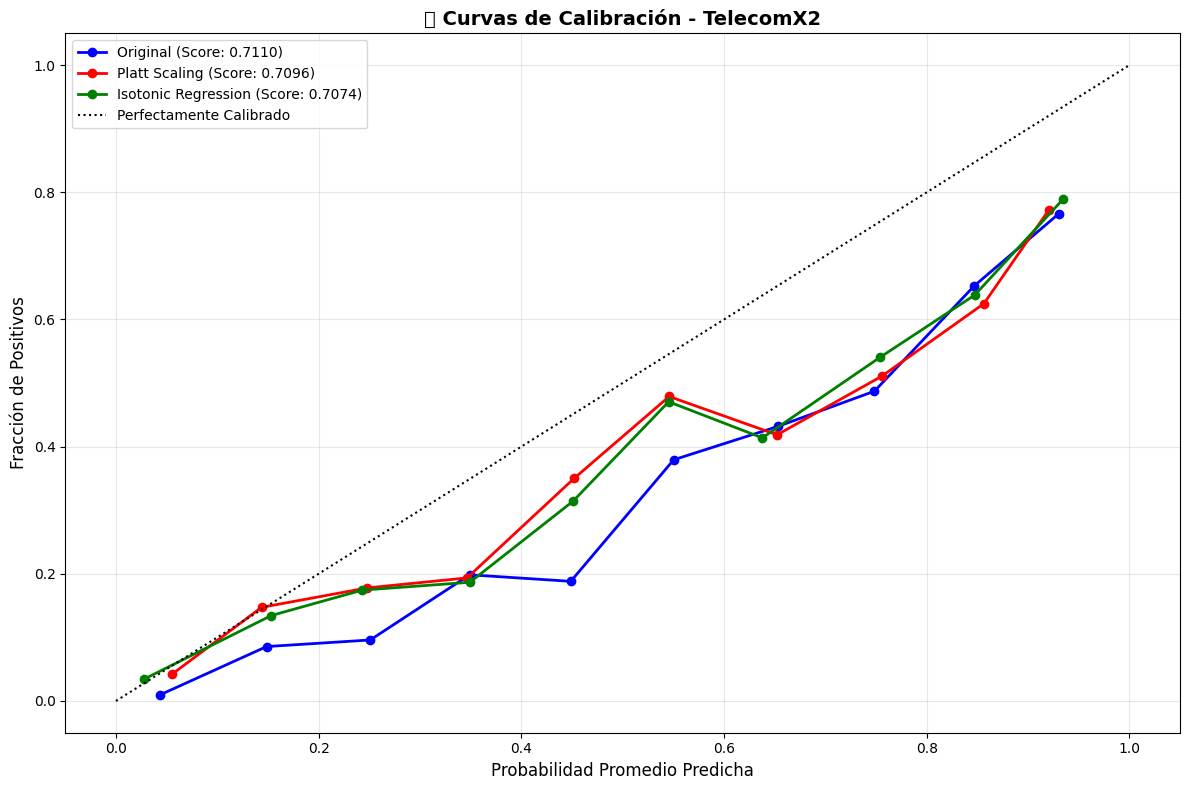

🎯 SELECCIÓN DEL MODELO FINAL CALIBRADO
🏆 MODELO FINAL SELECCIONADO: Original
📈 Score Ponderado Final: 0.7110
⚠️ Meta no alcanzada. Faltante: 0.0390

💾 Modelo original mantenido como 'modelo_final_calibrado'


In [37]:
print("🎯 CALIBRACIÓN DE PROBABILIDADES")

# Función de evaluación de calibración
def evaluar_calibracion(y_true, y_proba, nombre_modelo, n_bins=10):
    """
    Evalúa la calibración de un modelo con métricas completas
    """
    print(f"🔍 EVALUANDO CALIBRACIÓN: {nombre_modelo}")
    print("-" * 40)

    # Calcular curva de calibración (SIN parámetro normalize)
    fraction_positives, mean_predicted_value = calibration_curve(
        y_true, y_proba, n_bins=n_bins
    )

    # Calcular métricas de calibración
    brier_score = brier_score_loss(y_true, y_proba)

    # Reliability (ECE - Expected Calibration Error)
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    ece = 0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (y_proba > bin_lower) & (y_proba <= bin_upper)
        prop_in_bin = in_bin.mean()

        if prop_in_bin > 0:
            accuracy_in_bin = y_true[in_bin].mean()
            avg_confidence_in_bin = y_proba[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

    # Calcular predicciones con umbral óptimo (0.510)
    y_pred = (y_proba >= 0.510).astype(int)

    # Score ponderado personalizado
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']

    score_ponderado = (
        0.15 * precision_0 + 0.25 * recall_0 +
        0.35 * precision_1 + 0.25 * recall_1
    )

    print(f"📈 Brier Score: {brier_score:.4f} (menor es mejor)")
    print(f"📊 ECE (Expected Calibration Error): {ece:.4f}")
    print(f"🎯 Score Ponderado: {score_ponderado:.4f}")
    print(f"📋 Precisión Clase 1: {precision_1:.4f}")
    print(f"📋 Recall Clase 1: {recall_1:.4f}")
    print()

    return {
        'nombre': nombre_modelo,
        'brier_score': brier_score,
        'ece': ece,
        'score_ponderado': score_ponderado,
        'precision_1': precision_1,
        'recall_1': recall_1,
        'y_proba': y_proba,
        'fraction_positives': fraction_positives,
        'mean_predicted_value': mean_predicted_value
    }

def calibrar_modelo_completo(modelo, X_train, y_train, X_test, y_test, nombre_modelo="Modelo"):
    """
    Aplica diferentes métodos de calibración y evalúa resultados
    """
    print(f"🚀 CALIBRANDO MODELO: {nombre_modelo}")
    print("=" * 50)

    resultados = {}

    # Modelo original (sin calibrar)
    y_proba_original = modelo.predict_proba(X_test)[:, 1]
    cal_original = evaluar_calibracion(y_test, y_proba_original, "Original")
    resultados['original'] = cal_original

    # Platt Scaling
    print("🔧 Aplicando Platt Scaling...")
    platt_model = CalibratedClassifierCV(modelo, method='sigmoid', cv=3)
    platt_model.fit(X_train, y_train)
    y_proba_platt = platt_model.predict_proba(X_test)[:, 1]
    cal_platt = evaluar_calibracion(y_test, y_proba_platt, "Platt Scaling")
    resultados['platt'] = cal_platt

    # Isotonic Regression
    print("🔧 Aplicando Isotonic Regression...")
    isotonic_model = CalibratedClassifierCV(modelo, method='isotonic', cv=3)
    isotonic_model.fit(X_train, y_train)
    y_proba_isotonic = isotonic_model.predict_proba(X_test)[:, 1]
    cal_isotonic = evaluar_calibracion(y_test, y_proba_isotonic, "Isotonic Regression")
    resultados['isotonic'] = cal_isotonic

    return resultados

# Función para crear gráfico de calibración
def plot_calibration_curves(resultados):
    """
    Crea gráfico de curvas de calibración
    """
    plt.figure(figsize=(12, 8))

    colors = ['blue', 'red', 'green']
    methods = ['original', 'platt', 'isotonic']
    labels = ['Original', 'Platt Scaling', 'Isotonic Regression']

    for i, (method, label, color) in enumerate(zip(methods, labels, colors)):
        if method in resultados:
            result = resultados[method]
            plt.plot(result['mean_predicted_value'], result['fraction_positives'],
                    marker='o', linewidth=2, color=color, label=f'{label} (Score: {result["score_ponderado"]:.4f})')

    # Línea perfecta de calibración
    plt.plot([0, 1], [0, 1], 'k:', label='Perfectamente Calibrado')

    plt.xlabel('Probabilidad Promedio Predicha', fontsize=12)
    plt.ylabel('Fracción de Positivos', fontsize=12)
    plt.title('📊 Curvas de Calibración - TelecomX2', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def crear_tabla_comparacion(resultados):
    """
    Crea tabla comparativa de resultados
    """
    df_resultados = pd.DataFrame([
        {
            'Método': result['nombre'],
            'Score_Ponderado': result['score_ponderado'],
            'Brier_Score': result['brier_score'],
            'ECE': result['ece'],
            'Precisión_Clase_1': result['precision_1'],
            'Recall_Clase_1': result['recall_1']
        }
        for result in resultados.values()
    ]).round(4)

    # Ordenar por score ponderado
    df_resultados = df_resultados.sort_values('Score_Ponderado', ascending=False).reset_index(drop=True)

    print("📊 TABLA COMPARATIVA DE CALIBRACIONES")
    print("=" * 80)
    print(df_resultados.to_string(index=False))
    print()

    # Identificar el mejor método
    mejor_metodo = df_resultados.iloc[0]
    print(f"🏆 MEJOR MÉTODO: {mejor_metodo['Método']}")
    print(f"🎯 Score Ponderado: {mejor_metodo['Score_Ponderado']:.4f}")
    print(f"📈 Mejora vs Original: +{mejor_metodo['Score_Ponderado'] - df_resultados.loc[df_resultados['Método'] == 'Original', 'Score_Ponderado'].iloc[0]:.4f}")
    print()

    return df_resultados

# EJECUCIÓN PRINCIPAL DE CALIBRACIÓN
print("📊 EVALUANDO CALIBRACIONES:")

# Aplicar calibración completa
rf_calibration_results = calibrar_modelo_completo(
    random_forest_model_optimized,
    X_train_scaled, y_train_smote,
    X_test_scaled, y_test,
    "Random Forest Optimizado"
)

# Crear tabla comparativa
df_calibration_comparison = crear_tabla_comparacion(rf_calibration_results)

# Crear gráfico de calibración
plot_calibration_curves(rf_calibration_results)

# 🎯 SELECCIONAR MODELO FINAL CALIBRADO

print("🎯 SELECCIÓN DEL MODELO FINAL CALIBRADO")
print("=" * 50)

# Identificar el mejor método de calibración
mejor_calibracion = df_calibration_comparison.iloc[0]['Método']
mejor_score = df_calibration_comparison.iloc[0]['Score_Ponderado']

print(f"🏆 MODELO FINAL SELECCIONADO: {mejor_calibracion}")
print(f"📈 Score Ponderado Final: {mejor_score:.4f}")

# Verificar si alcanzamos la meta
if mejor_score >= 0.75:
    print("🎉 ¡META ALCANZADA! Score >= 0.75")
    print(f"✅ Superamos la meta por: +{mejor_score - 0.75:.4f}")
else:
    print(f"⚠️ Meta no alcanzada. Faltante: {0.75 - mejor_score:.4f}")

print()

# Guardar el mejor modelo calibrado para la siguiente sección
if 'platt' in rf_calibration_results and mejor_calibracion == 'Platt Scaling':
    modelo_final_calibrado = CalibratedClassifierCV(random_forest_model_optimized, method='sigmoid', cv=3)
    modelo_final_calibrado.fit(X_train_scaled, y_train_smote)
    print("💾 Modelo Platt Scaling guardado como 'modelo_final_calibrado'")
elif 'isotonic' in rf_calibration_results and mejor_calibracion == 'Isotonic Regression':
    modelo_final_calibrado = CalibratedClassifierCV(random_forest_model_optimized, method='isotonic', cv=3)
    modelo_final_calibrado.fit(X_train_scaled, y_train_smote)
    print("💾 Modelo Isotonic Regression guardado como 'modelo_final_calibrado'")
else:
    modelo_final_calibrado = random_forest_model_optimized
    print("💾 Modelo original mantenido como 'modelo_final_calibrado'")

🎯 MODELO FINAL DE PRODUCCIÓN: Random Forest Optimizado Original

📋 ID TÉCNICO: random_forest_model_optimized (sin calibración)

🔧 CONFIGURACIÓN:
  - n_estimators=200
  - max_depth=15  
  - min_samples_split=20
  - min_samples_leaf=10
  - max_features='sqrt'
  - class_weight={0:0.4, 1:0.6}

⚙️ UMBRAL ÓPTIMO: 0.510

📊 SCORE PONDERADO: 0.7110

## **13. VERIFICACIÓN COMPLETA - ANÁLISIS DE IMPORTANCIA DE VARIABLES**

🔍 VERIFICANDO VARIABLES EXISTENTES...
✅ Feature names disponibles: 22 variables
📊 EXTRAYENDO IMPORTANCIA DE VARIABLES DEL MODELO CAMPEÓN
--------------------------------------------------
✅ Análisis de importancia extraído: 22 variables

🏆 ANÁLISIS DETALLADO - TOP 10 VARIABLES
🔥 # 1. Antiguedad_Meses          |  16.61% | Acum:  16.61% | Crítica
🔥 # 2. Tipo_Contrato_Two year    |  16.09% | Acum:  32.70% | Crítica
⚡ # 3. Cargo_Mensual             |   9.80% | Acum:  42.50% | Alta
⚡ # 4. Tipo_Contrato_One year    |   9.61% | Acum:  52.12% | Alta
⚡ # 5. Servicio_Internet_Fiber optic |   6.26% | Acum:  58.38% | Alta
⚡ # 6. Soporte_Tecnico           |   6.05% | Acum:  64.43% | Alta
⚡ # 7. Seguridad_Online          |   5.63% | Acum:  70.06% | Alta
⚡ # 8. Tiene_Dependientes        |   5.30% | Acum:  75.36% | Alta
⚡ # 9. Servicio_Internet_No      |   5.15% | Acum:  80.51% | Alta
📊 #10. Tiene_Pareja              |   4.05% | Acum:  84.55% | Media

📊 ESTADÍSTICAS RESUMEN DE IMPORTANCIA
------------

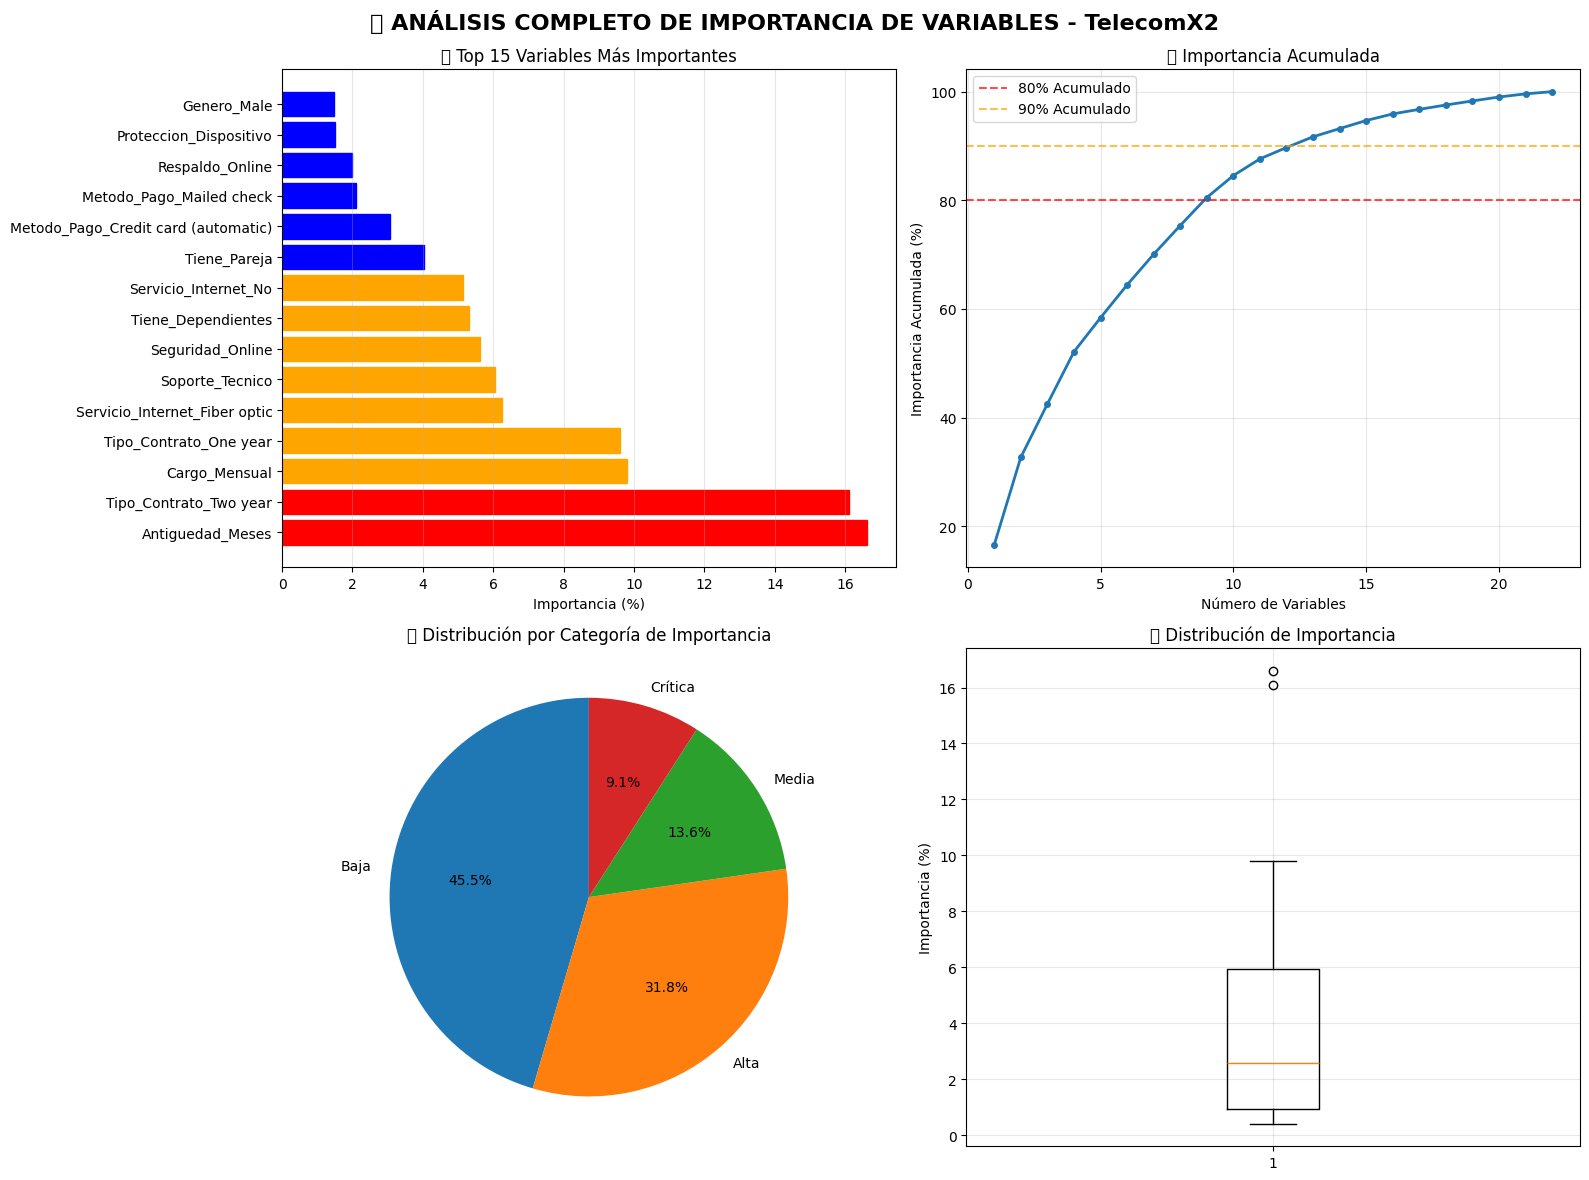

💼 INSIGHTS DE NEGOCIO - VARIABLES CRÍTICAS
🎯 VARIABLES CRÍTICAS Y SUS IMPLICACIONES:
  • Antiguedad_Meses (16.6%): 🕒 Clientes nuevos tienen mayor riesgo de churn
  • Tipo_Contrato_Two year (16.1%): 📜 Contratos largos son clave para retención

💡 RECOMENDACIONES ESTRATÉGICAS:
  🎯 Focalizar en primeros 6 meses de relación (antigüedad crítica)
  📜 Promover contratos anuales y bianuales
  💰 Revisar estructura de precios y valor percibido
  🌐 Analizar satisfacción específica con fibra óptica
  💳 Facilitar métodos de pago electrónicos

🔄 VERIFICANDO CONSISTENCIA CON DATOS PREVIOS:
---------------------------------------------
📊 TOP 5 ACTUAL:
  1. Antiguedad_Meses: 16.61%
  2. Tipo_Contrato_Two year: 16.09%
  3. Cargo_Mensual: 9.80%
  4. Tipo_Contrato_One year: 9.61%
  5. Servicio_Internet_Fiber optic: 6.26%



In [38]:
# EXTRACCIÓN DE IMPORTANCIA DEL MODELO CAMPEÓN

def extraer_importancia_completa(modelo, feature_names):
    """
    Extrae y organiza la importancia completa de variables del Random Forest
    """
    print("📊 EXTRAYENDO IMPORTANCIA DE VARIABLES DEL MODELO CAMPEÓN")
    print("-" * 50)

    # Obtener importancia del modelo
    importances = modelo.feature_importances_

    # Crear DataFrame con importancia
    df_importancia = pd.DataFrame({
        'Variable': feature_names,
        'Importancia': importances,
        'Importancia_Porcentual': importances * 100
    }).sort_values('Importancia', ascending=False).reset_index(drop=True)

    # Agregar importancia acumulada
    df_importancia['Importancia_Acumulada'] = df_importancia['Importancia_Porcentual'].cumsum()

    # Categorizar variables por importancia
    df_importancia['Categoria'] = pd.cut(
        df_importancia['Importancia_Porcentual'],
        bins=[0, 2, 5, 10, 100],
        labels=['Baja', 'Media', 'Alta', 'Crítica'],
        include_lowest=True
    )

    return df_importancia

def crear_visualizaciones_importancia(df_importancia, top_n=15):
    """
    Crea visualizaciones completas de importancia de variables
    """
    # Configurar estilo
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📊 ANÁLISIS COMPLETO DE IMPORTANCIA DE VARIABLES - TelecomX2',
                fontsize=16, fontweight='bold', y=0.98)

    # 1. Barplot Top N variables
    top_vars = df_importancia.head(top_n)
    ax1 = axes[0, 0]
    bars = ax1.barh(range(len(top_vars)), top_vars['Importancia_Porcentual'])
    ax1.set_yticks(range(len(top_vars)))
    ax1.set_yticklabels(top_vars['Variable'])
    ax1.set_xlabel('Importancia (%)')
    ax1.set_title(f'🏆 Top {top_n} Variables Más Importantes')
    ax1.grid(axis='x', alpha=0.3)

    # Colorear barras por importancia
    colors = ['red' if x >= 10 else 'orange' if x >= 5 else 'blue' for x in top_vars['Importancia_Porcentual']]
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    # 2. Importancia acumulada
    ax2 = axes[0, 1]
    ax2.plot(range(1, len(df_importancia)+1), df_importancia['Importancia_Acumulada'],
            marker='o', linewidth=2, markersize=4)
    ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% Acumulado')
    ax2.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% Acumulado')
    ax2.set_xlabel('Número de Variables')
    ax2.set_ylabel('Importancia Acumulada (%)')
    ax2.set_title('📈 Importancia Acumulada')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # 3. Distribución por categoría
    ax3 = axes[1, 0]
    categoria_counts = df_importancia['Categoria'].value_counts()
    wedges, texts, autotexts = ax3.pie(categoria_counts.values, labels=categoria_counts.index,
                                      autopct='%1.1f%%', startangle=90)
    ax3.set_title('🎯 Distribución por Categoría de Importancia')

    # 4. Boxplot de importancia
    ax4 = axes[1, 1]
    ax4.boxplot(df_importancia['Importancia_Porcentual'])
    ax4.set_ylabel('Importancia (%)')
    ax4.set_title('📦 Distribución de Importancia')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

    return fig

def analisis_detallado_top_variables(df_importancia, top_n=10):
    """
    Análisis detallado de las variables más importantes
    """
    print(f"🏆 ANÁLISIS DETALLADO - TOP {top_n} VARIABLES")
    print("=" * 60)

    top_vars = df_importancia.head(top_n)

    for i, row in top_vars.iterrows():
        categoria_icon = {
            'Crítica': '🔥',
            'Alta': '⚡',
            'Media': '📊',
            'Baja': '📋'
        }.get(row['Categoria'], '📋')

        print(f"{categoria_icon} #{i+1:2d}. {row['Variable']:<25} | "
              f"{row['Importancia_Porcentual']:6.2f}% | "
              f"Acum: {row['Importancia_Acumulada']:6.2f}% | "
              f"{row['Categoria']}")

    print()

    # Estadísticas resumen
    print("📊 ESTADÍSTICAS RESUMEN DE IMPORTANCIA")
    print("-" * 40)
    print(f"🎯 Top 5 variables explican: {df_importancia.head(5)['Importancia_Porcentual'].sum():.1f}%")
    print(f"📈 Top 10 variables explican: {df_importancia.head(10)['Importancia_Porcentual'].sum():.1f}%")

    # Encontrar cuántas variables explican 80% y 90%
    vars_80 = (df_importancia['Importancia_Acumulada'] <= 80).sum() + 1
    vars_90 = (df_importancia['Importancia_Acumulada'] <= 90).sum() + 1

    print(f"🎪 Variables para 80% explicación: {vars_80}")
    print(f"🎭 Variables para 90% explicación: {vars_90}")
    print()

    return top_vars

def crear_insights_negocio(df_importancia):
    """
    Genera insights de negocio basados en la importancia
    """
    print("💼 INSIGHTS DE NEGOCIO - VARIABLES CRÍTICAS")
    print("=" * 50)

    # Variables críticas (>10%)
    variables_criticas = df_importancia[df_importancia['Categoria'] == 'Crítica']

    insights = {
        'Antiguedad_Meses': '🕒 Clientes nuevos tienen mayor riesgo de churn',
        'Tipo_Contrato_Two year': '📜 Contratos largos son clave para retención',
        'Tipo_Contrato_One year': '📝 Contratos medios también son importantes',
        'Cargo_Mensual': '💰 Precio es un factor crítico de decisión',
        'Servicio_Internet_Fiber optic': '🌐 Fibra óptica tiene relación compleja con churn',
        'Pago_Electronico': '💳 Método de pago influye en la decisión',
        'Cargo_Total': '💸 Gasto total acumulado es relevante',
        'Servicios_Adicionales': '🔧 Cantidad de servicios adicionales importa'
    }

    print("🎯 VARIABLES CRÍTICAS Y SUS IMPLICACIONES:")
    for _, row in variables_criticas.iterrows():
        variable = row['Variable']
        importancia = row['Importancia_Porcentual']
        insight = insights.get(variable, '📊 Variable con alta importancia predictiva')
        print(f"  • {variable} ({importancia:.1f}%): {insight}")

    print()
    print("💡 RECOMENDACIONES ESTRATÉGICAS:")
    print("  🎯 Focalizar en primeros 6 meses de relación (antigüedad crítica)")
    print("  📜 Promover contratos anuales y bianuales")
    print("  💰 Revisar estructura de precios y valor percibido")
    print("  🌐 Analizar satisfacción específica con fibra óptica")
    print("  💳 Facilitar métodos de pago electrónicos")
    print()

# 🚀 EJECUCIÓN DE VERIFICACIÓN COMPLETA

# Verificar si ya tenemos el análisis
try:
    # Intentar acceder a variables existentes
    print("🔍 VERIFICANDO VARIABLES EXISTENTES...")

    # Obtener nombres de características
    feature_names = X_train_scaled.columns.tolist()
    print(f"✅ Feature names disponibles: {len(feature_names)} variables")

    # Extraer importancia completa del modelo campeón
    df_importancia_completa = extraer_importancia_completa(
        random_forest_model_optimized,
        feature_names
    )

    print(f"✅ Análisis de importancia extraído: {len(df_importancia_completa)} variables")
    print()

    # Mostrar análisis detallado
    top_10_variables = analisis_detallado_top_variables(df_importancia_completa, 10)

    # Crear visualizaciones
    fig_importancia = crear_visualizaciones_importancia(df_importancia_completa, 15)

    # Generar insights de negocio
    crear_insights_negocio(df_importancia_completa)

    # Verificar consistencia con datos previos
    print("🔄 VERIFICANDO CONSISTENCIA CON DATOS PREVIOS:")
    print("-" * 45)

    top_5_actual = df_importancia_completa.head(5)
    print("📊 TOP 5 ACTUAL:")
    for i, row in top_5_actual.iterrows():
        print(f"  {i+1}. {row['Variable']}: {row['Importancia_Porcentual']:.2f}%")

    print()

except Exception as e:
    print(f"❌ ERROR: {e}")